In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
import seaborn
import datetime
import random
from scipy.optimize import minimize

**I 10 titoli scelti per l'analisi:**
- ASML: ASML Holding N.V., azienda olandese leader nella produzione di macchinari per la litografia utilizzati nella produzione di semiconduttori.
- SAN.PA: Sanofi, multinazionale farmaceutica francese specializzata in farmaci per il diabete, oncologia e vaccini.
- TTE: TotalEnergies SE, multinazionale francese operante nei settori del petrolio e del gas.
- MC.PA: LVMH Moët Hennessy Louis Vuitton SE, conglomerato francese specializzato in beni di lusso.
- REP.MC: Repsol S.A., multinazionale spagnola attiva nel settore petrolifero, del gas e delle energie rinnovabili.
- VOW3.DE: Volkswagen AG, casa automobilistica tedesca.
- TIT.MI: Telecom Italia S.p.A., principale azienda italiana di telecomunicazioni.
- AD.AS: Koninklijke Ahold Delhaize N.V., multinazionale olandese attiva nella grande distribuzione organizzata.
- MT.AS: ArcelorMittal S.A., multinazionale lussemburghese leader nella produzione di acciaio.
- SIE.DE: Siemens AG, multinazionale tedesca operante nei settori dell'elettronica e dell'elettrotecnica.

In [ ]:
tickers = 'ASML', 'SAN.PA', 'TTE', 'MC.PA', 'REP.MC', 'VOW3.DE','TIT.MI', 'AD.AS', 'MT.AS', 'SIE.DE'

In [ ]:
df = yf.download(tickers, start="2015-03-01", end="2025-03-01", auto_adjust=True)
df_close = df['Close']
df_close = df_close.fillna(method='ffill')
dati = df_close

[*********************100%***********************]  10 of 10 completed
<ipython-input-4-e0167b6e0f60>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_close = df_close.fillna(method='ffill')


Storico Prezzi di mercato (aggiustati)

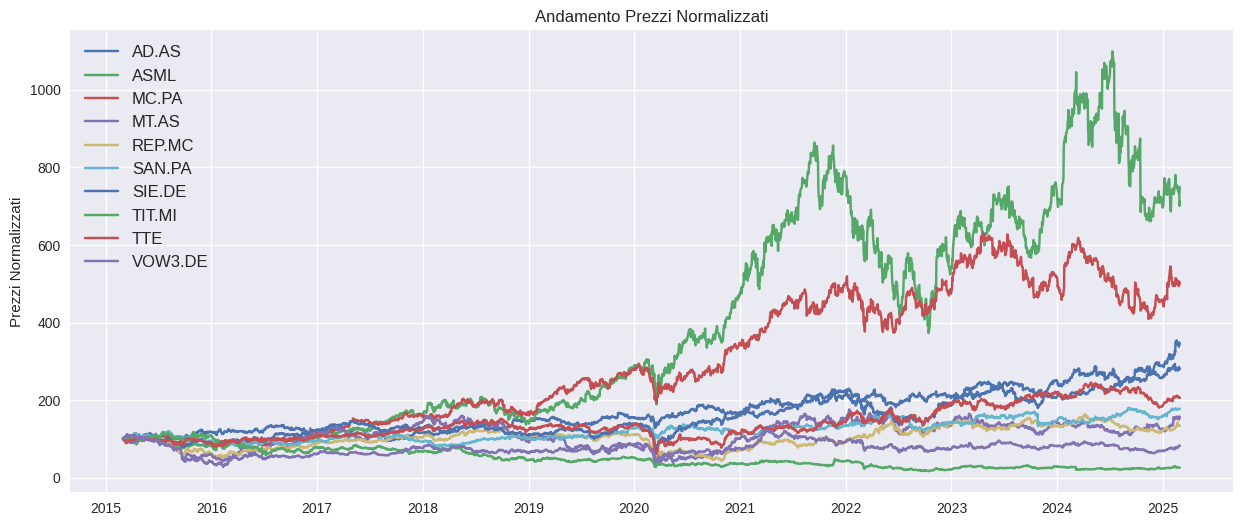

In [ ]:
df_normalized = df_close / df_close.iloc[0] * 100

plt.figure(figsize=(15, 6))
for i in range(df_normalized.shape[1]):
    plt.plot(df_normalized.iloc[:, i], label=df_normalized.columns[i])

plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Prezzi Normalizzati')
plt.title('Andamento Prezzi Normalizzati')
plt.grid(True)
plt.show()


Rendimenti medi annui

In [ ]:
rendimenti = dati.pct_change(1)
(rendimenti.mean()+1)**253-1

,0
Ticker,
AD.AS,0.129661
ASML,0.295221
MC.PA,0.216628
MT.AS,0.154708
REP.MC,0.081058
SAN.PA,0.083211
SIE.DE,0.169274
TIT.MI,-0.053947
TTE,0.118826


Deviazione standard annualizzata per ogni titolo

In [ ]:
deviazione_standard_mensile = rendimenti.std()
deviazione_standard_annuale = deviazione_standard_mensile * np.sqrt(12)*100
print(deviazione_standard_annuale)

Ticker
AD.AS      4.491542
ASML       7.931347
MC.PA      6.036943
MT.AS      9.783091
REP.MC     6.848524
SAN.PA     4.719473
SIE.DE     5.779347
TIT.MI     8.422909
TTE        6.251634
VOW3.DE    7.474065
dtype: float64


Matrice varianza-covarianza dei rendimenti mensili

In [ ]:
tickers = ['ASML', 'SAN.PA', 'TTE', 'MC.PA', 'REP.MC', 'VOW3.DE', 'TIT.MI', 'AD.AS', 'MT.AS', 'SIE.DE']

df = yf.download(tickers, start="2015-03-01", end="2025-03-01", auto_adjust=True)
df_close = df['Close'].fillna(method='ffill')

rendimenti = (df_close.pct_change().dropna()) * 100  # Assicurati di moltiplicare per 100

# Ricalcolo della matrice varianza-covarianza
var_cov_matrix = rendimenti.cov()

pd.set_option("display.float_format", "{:.4f}".format)
pd.set_option("display.width", 200)  # Aumenta la larghezza della tabella
pd.set_option("display.max_columns", None)  # Evita l'andata a capo delle colonne

# Stampare la matrice in modo leggibile
print(var_cov_matrix)

[*********************100%***********************]  10 of 10 completed


Ticker   AD.AS   ASML  MC.PA  MT.AS  REP.MC  SAN.PA  SIE.DE  TIT.MI    TTE  VOW3.DE
Ticker                                                                             
AD.AS   1.6812 0.2271 0.5745 0.7008  0.4158  0.5479  0.5529  0.7480 0.3034   0.5662
ASML    0.2271 5.2422 1.7102 2.0896  0.9479  0.4761  1.6338  0.7656 1.6319   1.6831
MC.PA   0.5745 1.7102 3.0371 2.2496  1.2562  0.7996  1.7375  1.3150 1.1969   1.9389
MT.AS   0.7008 2.0896 2.2496 7.9757  3.0394  0.8540  2.5340  2.2168 2.4506   3.1389
REP.MC  0.4158 0.9479 1.2562 3.0394  3.9085  0.7044  1.4668  1.6761 2.3455   1.9154
SAN.PA  0.5479 0.4761 0.7996 0.8540  0.7044  1.8561  0.7596  0.8208 0.4872   0.7639
SIE.DE  0.5529 1.6338 1.7375 2.5340  1.4668  0.7596  2.7834  1.4472 1.3345   2.0796
TIT.MI  0.7480 0.7656 1.3150 2.2168  1.6761  0.8208  1.4472  5.9121 1.2892   1.8249
TTE     0.3034 1.6319 1.1969 2.4506  2.3455  0.4872  1.3345  1.2892 3.2569   1.6391
VOW3.DE 0.5662 1.6831 1.9389 3.1389  1.9154  0.7639  2.0796  1.8249 1.6391  

<ipython-input-38-b8c5e383925a>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_close = df['Close'].fillna(method='ffill')


Matrice di correlazione

<Axes: xlabel='Ticker', ylabel='Ticker'>

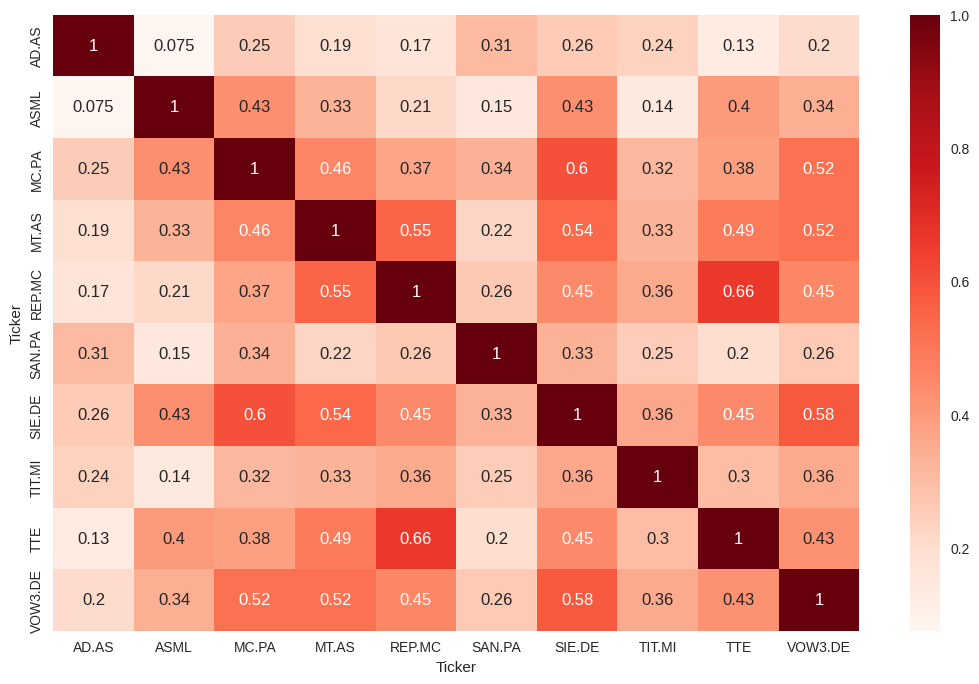

In [ ]:
plt.figure(figsize=(13,8))
seaborn.heatmap(rendimenti.corr(),cmap="Reds", annot=True, annot_kws={"size":12})

In [ ]:
def azioni_con_piu_bassa_correlazione(rendimenti):
    matrice_correlazione = rendimenti.corr()

    # Rimuovo la diagonale (correlazione di un'azione con se stessa)
    matrice_correlazione = matrice_correlazione.where(~np.eye(matrice_correlazione.shape[0], dtype=bool))

    coppie_correlazione = matrice_correlazione.stack()

    # Ordino le coppie di azioni per valore di correlazione in ordine crescente
    coppie_correlazione_ordinate = coppie_correlazione.sort_values()

    return coppie_correlazione_ordinate.head(5)

coppie_minime = azioni_con_piu_bassa_correlazione(rendimenti)

print("Le 5 coppie di azioni con la correlazione più bassa:")
print(coppie_minime)

Le 5 coppie di azioni con la correlazione più bassa:
Ticker  Ticker
AD.AS   ASML      0.075053
ASML    AD.AS     0.075053
AD.AS   TTE       0.132482
TTE     AD.AS     0.132482
TIT.MI  ASML      0.140538
dtype: float64


Frontiera efficiente portafogli con i 5 titoli selezionati  (ASML, TTE, AD.AS, TIT.MI, SIE.DE) senza vendite allo scoperto.

I titoli sono stati scelti sulla base del rendimento medio annuo, della deviazione standard e della correlazione di quest'ultimi.

In [ ]:
selected_tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']
dati = yf.download(selected_tickers, start="2015-03-10", end="2025-03-10", interval='1mo')
rendimenti = dati['Close'].pct_change().dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


Price           Close                                                   High  \
Ticker          AD.AS        ASML     SIE.DE    TIT.MI        TTE      AD.AS   
Date                                                                           
2015-04-01  12.270009   96.944229  63.374474  1.007504  30.341122  14.110510   
2015-05-01  13.465516  102.472733  62.250099  1.061732  28.316511  13.992791   
2015-06-01  12.218235   95.017700  58.720982  1.082662  27.576206  14.440063   
2015-07-01  13.181875   90.491737  63.328976  1.146404  28.009960  13.283694   
2015-08-01  12.810966   83.054939  57.492619  1.030336  26.367666  13.654606   

Price                                                         Low             \
Ticker            ASML     SIE.DE    TIT.MI        TTE      AD.AS       ASML   
Date                                                                           
2015-04-01  100.711864  67.722489  1.088370  30.716882  12.117519  85.088845   
2015-05-01  104.151712  64.498849  1.08

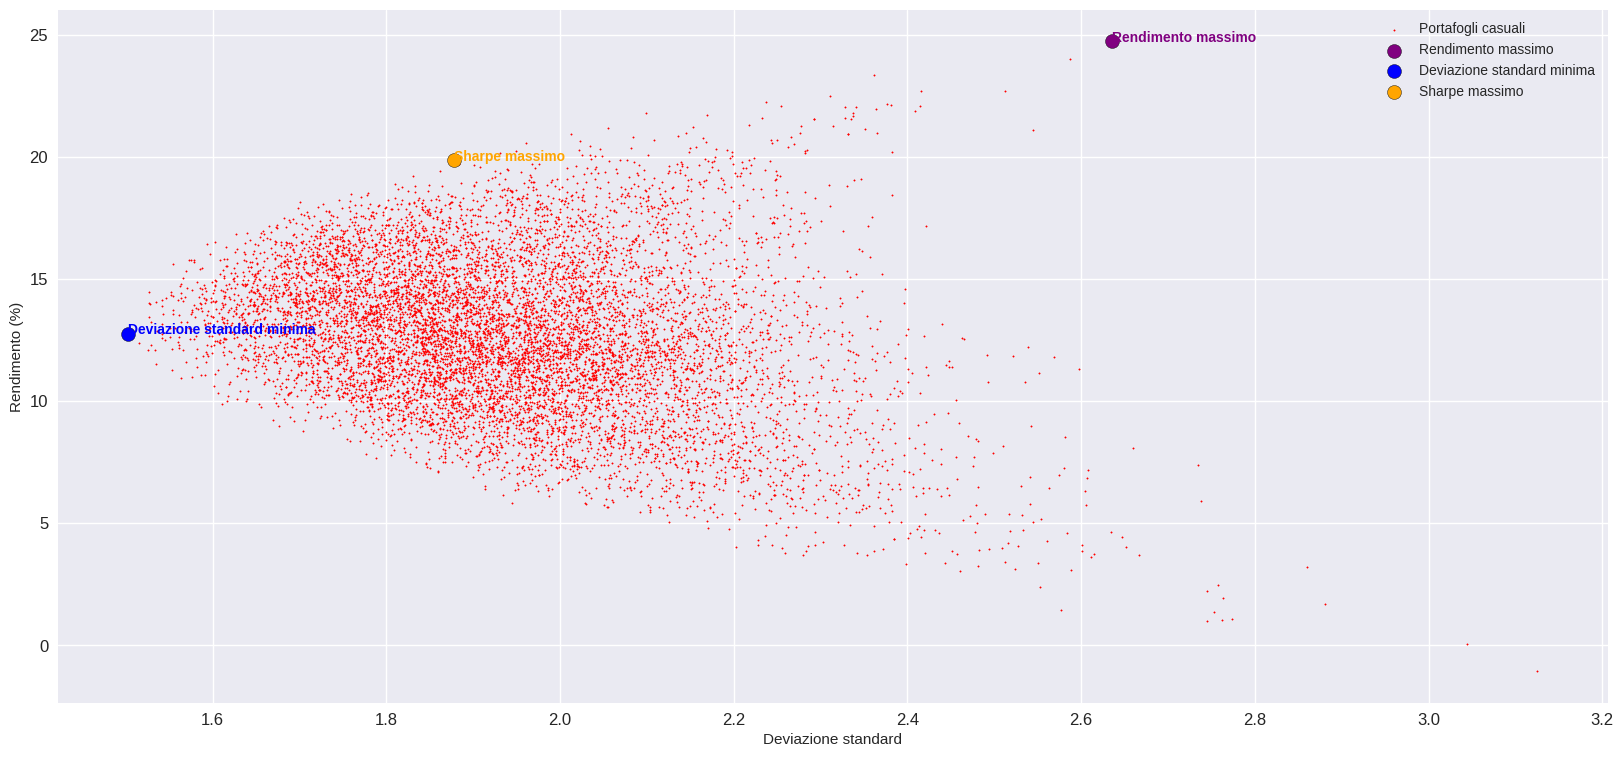

In [ ]:
selected_tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']
dati = yf.download(selected_tickers, start="2015-03-10", end="2025-03-10", interval='1mo')

print(dati.head())
print(dati.columns)

dati_selezionati = dati['Close'][selected_tickers]

missing_tickers = [t for t in selected_tickers if t not in dati['Close'].columns]
if missing_tickers:
    print("Attenzione! Questi ticker non sono stati trovati nei dati:", missing_tickers)

rendimenti = dati_selezionati.pct_change().dropna()
rendimenti = rendimenti.iloc[-120:]  # Ultimi 10 anni (10 * 12 mesi)

cov = rendimenti.cov() * 12 * 100

medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100

nomi = list(dati_selezionati.columns)

risk_free = 2.78

tabella = pd.DataFrame(columns=["rendimento", "deviazione_standard", "Sharpe"] + nomi)
tabella1 = pd.DataFrame(columns=["rendimento", "deviazione_standard", "Sharpe"] + nomi)

quante = 10000

for k in range(len(nomi)):
    w = np.zeros(len(nomi))
    w[k] = 1.00
    rend = np.dot(medie, w)
    vol = np.sqrt(np.dot(w, np.dot(cov, w)))
    sharpe_ratio = (rend - risk_free) / vol

    tabella1.loc[k] = [rend, vol, sharpe_ratio] + list(w * 100)

for k in range(quante):
    w = np.random.uniform(0, 1, len(nomi))
    w /= sum(w)  # Normalizzazione dei pesi (somma 1)

    rend = np.dot(medie, w)
    vol = np.sqrt(np.dot(w, np.dot(cov, w)))
    sharpe_ratio = (rend - risk_free) / vol

    tabella.loc[k] = [rend, vol, sharpe_ratio] + list(w * 100)

    if k % 1000 == 0:
        print(f"Portafoglio {k} generato")


portafoglio_rendimento_max = tabella.loc[tabella['rendimento'].idxmax()]
portafoglio_dev_std_min = tabella.loc[tabella['deviazione_standard'].idxmin()]
portafoglio_sharpe_max = tabella.loc[tabella['Sharpe'].idxmax()]


print("Portafoglio con il rendimento più alto:")
print(portafoglio_rendimento_max)

print("\nPortafoglio con la deviazione standard più bassa:")
print(portafoglio_dev_std_min)

print("\nPortafoglio con il Sharpe ratio più alto:")
print(portafoglio_sharpe_max)


ax = tabella.plot.scatter(x="deviazione_standard", y="rendimento", figsize=(20,9), fontsize=12, s=1, color="r", label="Portafogli casuali")

plt.scatter(portafoglio_rendimento_max['deviazione_standard'], portafoglio_rendimento_max['rendimento'], color="purple", s=100, edgecolors="black", label="Rendimento massimo")
plt.scatter(portafoglio_dev_std_min['deviazione_standard'], portafoglio_dev_std_min['rendimento'], color="blue", s=100, edgecolors="black", label="Deviazione standard minima")
plt.scatter(portafoglio_sharpe_max['deviazione_standard'], portafoglio_sharpe_max['rendimento'], color="orange", s=100, edgecolors="black", label="Sharpe massimo")

plt.annotate("Rendimento massimo", xy=(portafoglio_rendimento_max['deviazione_standard'], portafoglio_rendimento_max['rendimento']), size=10, weight="bold", color="purple")
plt.annotate("Deviazione standard minima", xy=(portafoglio_dev_std_min['deviazione_standard'], portafoglio_dev_std_min['rendimento']), size=10, weight="bold", color="blue")
plt.annotate("Sharpe massimo", xy=(portafoglio_sharpe_max['deviazione_standard'], portafoglio_sharpe_max['rendimento']), size=10, weight="bold", color="orange")

plt.xlabel("Deviazione standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.show()


Frontiera efficiente con 5 titoli (vendite allo scoperto permesse)

[*********************100%***********************]  5 of 5 completed


Portafoglio 0 generato
Portafoglio 1000 generato
Portafoglio 2000 generato
Portafoglio 3000 generato
Portafoglio 4000 generato
Portafoglio 5000 generato
Portafoglio 6000 generato
Portafoglio 7000 generato
Portafoglio 8000 generato
Portafoglio 9000 generato
Portafoglio con il rendimento più alto:
rendimento             22.737061
deviazione_standard     2.357782
Sharpe                  8.464337
ASML                   64.599373
TTE                    -0.477027
AD.AS                  -2.571677
TIT.MI                 -5.532485
SIE.DE                 26.819437
Name: 1930, dtype: float64

Portafoglio con la deviazione standard più bassa:
rendimento              5.738405
deviazione_standard     0.778965
Sharpe                  3.797868
ASML                   19.464905
TTE                    14.946303
AD.AS                  27.789320
TIT.MI                 -7.270209
SIE.DE                -30.529262
Name: 613, dtype: float64

Portafoglio con il Sharpe ratio più alto:
rendimento             15.94

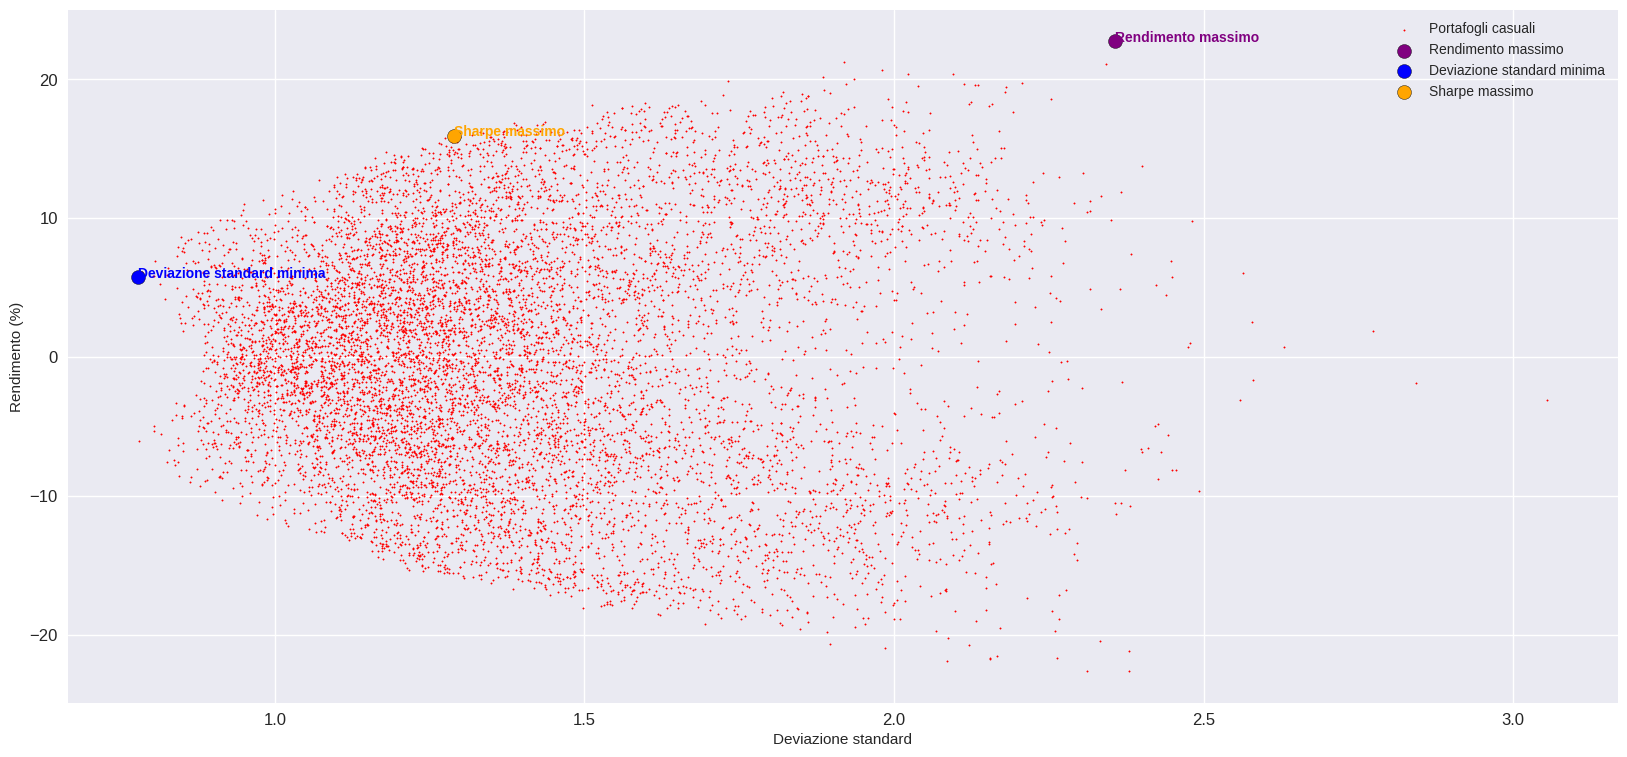

In [ ]:
selected_tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']
dati = yf.download(selected_tickers, start="2015-03-10", end="2025-03-10", interval='1mo')

dati_selezionati = dati['Close'][selected_tickers]

missing_tickers = [t for t in selected_tickers if t not in dati['Close'].columns]
if missing_tickers:
    print("Attenzione! Questi ticker non sono stati trovati nei dati:", missing_tickers)

rendimenti = dati_selezionati.pct_change().dropna()
rendimenti = rendimenti.iloc[-120:]

cov = rendimenti.cov() * 12 * 100

medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100

nomi = list(dati_selezionati.columns)

risk_free = 2.78

tabella = pd.DataFrame(columns=["rendimento", "deviazione_standard", "Sharpe"] + nomi)
tabella1 = pd.DataFrame(columns=["rendimento", "deviazione_standard", "Sharpe"] + nomi)

quante = 10000

for k in range(len(nomi)):
    w = np.zeros(len(nomi))
    w[k] = 1.00
    rend = np.dot(medie, w)
    vol = np.sqrt(np.dot(w, np.dot(cov, w)))
    sharpe_ratio = (rend - risk_free) / vol

    tabella1.loc[k] = [rend, vol, sharpe_ratio] + list(w * 100)

# Generazione portafogli casuali con vendite allo scoperto permesse
for k in range(quante):
    w = np.random.uniform(-1, 1, len(nomi))
    w /= np.sum(np.abs(w))

    rend = np.dot(medie, w)
    vol = np.sqrt(np.dot(w, np.dot(cov, w)))
    sharpe_ratio = (rend - risk_free) / vol

    tabella.loc[k] = [rend, vol, sharpe_ratio] + list(w * 100)

    if k % 1000 == 0:
        print(f"Portafoglio {k} generato")

portafoglio_rendimento_max = tabella.loc[tabella['rendimento'].idxmax()]
portafoglio_dev_std_min = tabella.loc[tabella['deviazione_standard'].idxmin()]
portafoglio_sharpe_max = tabella.loc[tabella['Sharpe'].idxmax()]

print("Portafoglio con il rendimento più alto:")
print(portafoglio_rendimento_max)

print("\nPortafoglio con la deviazione standard più bassa:")
print(portafoglio_dev_std_min)

print("\nPortafoglio con il Sharpe ratio più alto:")
print(portafoglio_sharpe_max)

ax = tabella.plot.scatter(x="deviazione_standard", y="rendimento", figsize=(20,9), fontsize=12, s=1, color="r", label="Portafogli casuali")

plt.scatter(portafoglio_rendimento_max['deviazione_standard'], portafoglio_rendimento_max['rendimento'], color="purple", s=100, edgecolors="black", label="Rendimento massimo")
plt.scatter(portafoglio_dev_std_min['deviazione_standard'], portafoglio_dev_std_min['rendimento'], color="blue", s=100, edgecolors="black", label="Deviazione standard minima")
plt.scatter(portafoglio_sharpe_max['deviazione_standard'], portafoglio_sharpe_max['rendimento'], color="orange", s=100, edgecolors="black", label="Sharpe massimo")

plt.annotate("Rendimento massimo", xy=(portafoglio_rendimento_max['deviazione_standard'], portafoglio_rendimento_max['rendimento']), size=10, weight="bold", color="purple")
plt.annotate("Deviazione standard minima", xy=(portafoglio_dev_std_min['deviazione_standard'], portafoglio_dev_std_min['rendimento']), size=10, weight="bold", color="blue")
plt.annotate("Sharpe massimo", xy=(portafoglio_sharpe_max['deviazione_standard'], portafoglio_sharpe_max['rendimento']), size=10, weight="bold", color="orange")

plt.xlabel("Deviazione standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.show()

In [ ]:
tickers = '^STOXX'
df = yf.download(tickers, start="2015-03-01", end="2025-03-01", auto_adjust=True)

df_close = df['Close'].fillna(method='ffill')

rendimenti_mensili = df_close.resample('M').last().pct_change().dropna()

rendimenti_mensili = rendimenti_mensili.iloc[-120:]

print(rendimenti_mensili.head())

[*********************100%***********************]  1 of 1 completed

Ticker        ^STOXX
Date                
2015-04-30 -0.003801
2015-05-31  0.010308
2015-06-30 -0.046415
2015-07-31  0.039495
2015-08-31 -0.084719



<ipython-input-14-245556e6fa99>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_close = df['Close'].fillna(method='ffill')
<ipython-input-14-245556e6fa99>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rendimenti_mensili = df_close.resample('M').last().pct_change().dropna()


In [ ]:
# Calcolo del rendimento annuo medio e della deviazione standard annua
rendimento_annuo = rendimenti_mensili.mean().iloc[0] * 12 * 100  # Espresso in percentuale
deviazione_standard_annua = rendimenti_mensili.std().iloc[0] * np.sqrt(12) * 100  # Espresso in percentuale

print(f"Rendimento annuo medio: {rendimento_annuo:.2f}%")
print(f"Deviazione standard annua: {deviazione_standard_annua:.2f}%")

Rendimento annuo medio: 4.41%
Deviazione standard annua: 14.12%


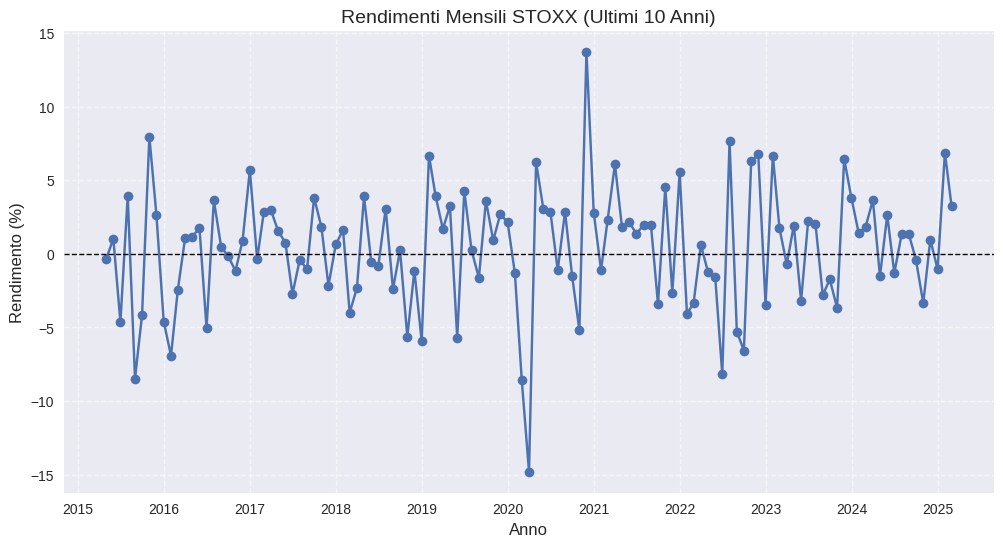

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(rendimenti_mensili.index, rendimenti_mensili * 100, marker='o', linestyle='-')

plt.title("Rendimenti Mensili STOXX (Ultimi 10 Anni)", fontsize=14)
plt.xlabel("Anno", fontsize=12)
plt.ylabel("Rendimento (%)", fontsize=12)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


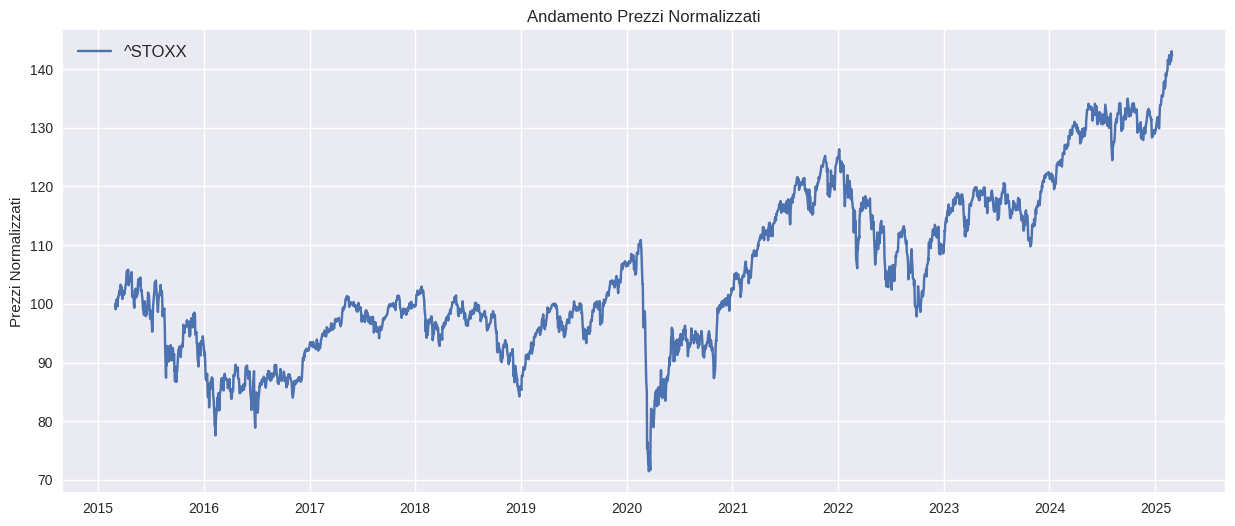

In [ ]:
df_normalized = df_close / df_close.iloc[0] * 100

plt.figure(figsize=(15, 6))
for i in range(df_normalized.shape[1]):
    plt.plot(df_normalized.iloc[:, i], label=df_normalized.columns[i])

plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Prezzi Normalizzati')
plt.title('Andamento Prezzi Normalizzati')
plt.grid(True)
plt.show()

Equipesato 10 titoli

[*********************100%***********************]  10 of 10 completed


Ticker effettivamente presenti: ['AD.AS', 'ASML', 'MC.PA', 'MT.AS', 'REP.MC', 'SAN.PA', 'SIE.DE', 'TIT.MI', 'TTE', 'VOW3.DE']
Portafoglio 0 generato
Portafoglio 1000 generato
Portafoglio 2000 generato
Portafoglio 3000 generato
Portafoglio 4000 generato
Portafoglio 5000 generato
Portafoglio 6000 generato
Portafoglio 7000 generato
Portafoglio 8000 generato
Portafoglio 9000 generato
Portafoglio Equipesato:


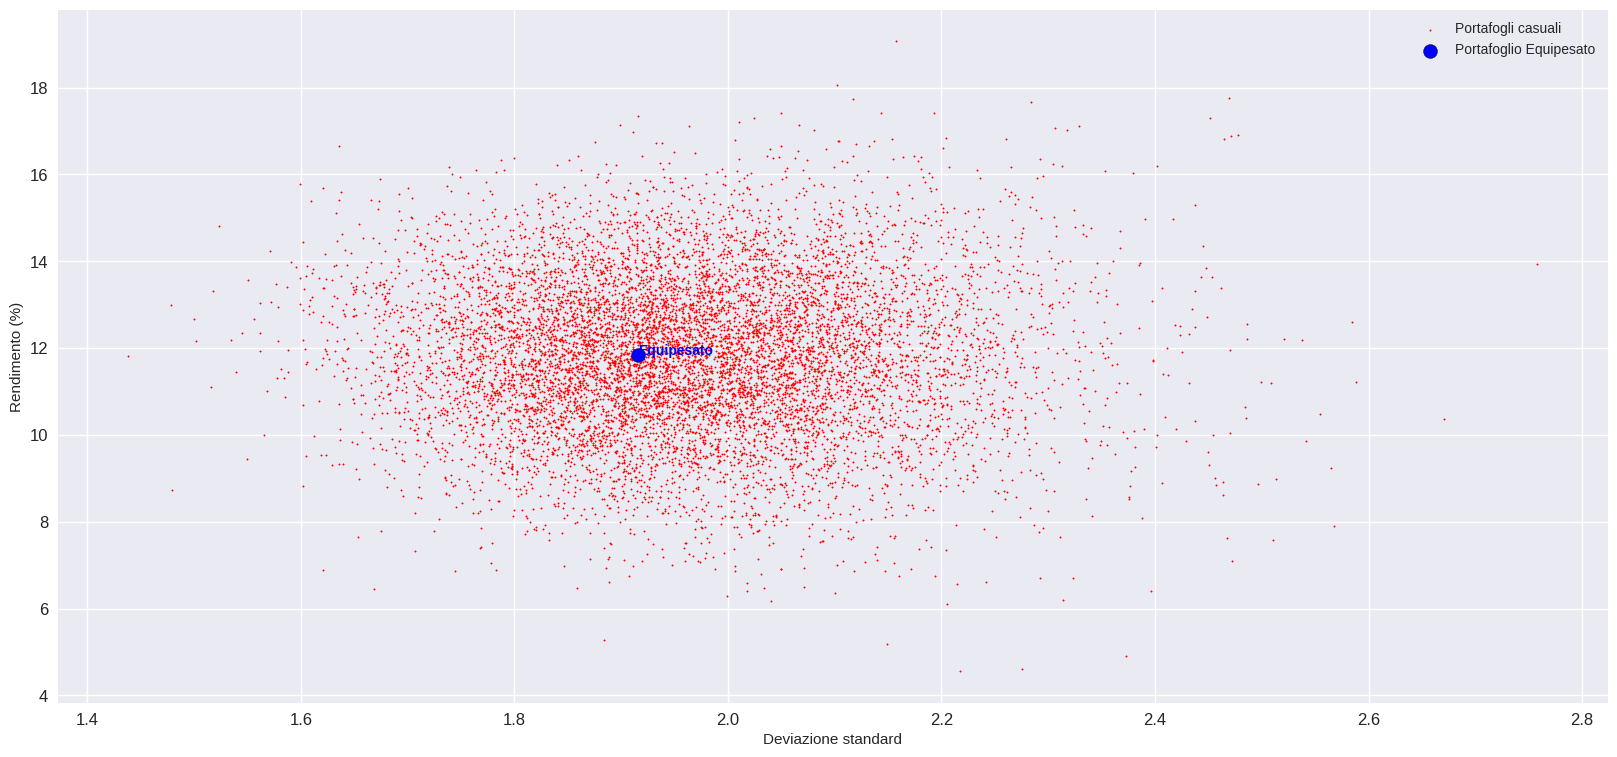

Statistiche Portafoglio Equipesato:
Rendimento atteso: 11.84%
Deviazione standard: 1.92%
Sharpe Ratio: 4.73
Pesi assegnati ai titoli (%):
ASML: 10.00%
SAN.PA: 10.00%
TTE: 10.00%
MC.PA: 10.00%
REP.MC: 10.00%
VOW3.DE: 10.00%
TIT.MI: 10.00%
AD.AS: 10.00%
MT.AS: 10.00%
SIE.DE: 10.00%


In [ ]:
selected_tickers_10 = ['ASML', 'SAN.PA', 'TTE', 'MC.PA', 'REP.MC', 'VOW3.DE', 'TIT.MI', 'AD.AS', 'MT.AS', 'SIE.DE']

df = yf.download(selected_tickers_10, start="2015-03-01", end="2025-03-01", interval="1mo", auto_adjust=True)

df_close = df['Close'].ffill()

print("Ticker effettivamente presenti:", df_close.columns.tolist())
tickers_mancanti = [t for t in selected_tickers_10 if t not in df_close.columns]

if tickers_mancanti:
    print("Ticker mancanti:", tickers_mancanti)

selected_tickers_10 = [t for t in selected_tickers_10 if t in df_close.columns]
dati_selected = df_close[selected_tickers_10]

rendimenti = dati_selected.pct_change().dropna()
rendimenti = rendimenti.iloc[-120:]

medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100
medie = medie.to_numpy()

cov = rendimenti.cov() * 12 * 100
dev_std = np.sqrt(np.diag(cov))

risk_free = 2.78  # Tasso risk-free

# Calcolo del portafoglio equidistribuito
w_eq = np.ones(len(selected_tickers_10)) / len(selected_tickers_10)

rend_eq = np.dot(medie, w_eq)
vol_eq = np.sqrt(np.dot(w_eq, np.dot(cov, w_eq)))
sharpe_eq = (rend_eq - risk_free) / vol_eq

tabella_equipesato = pd.DataFrame(columns=["rendimento", "deviazione_standard", "Sharpe"] + selected_tickers_10)
tabella_equipesato.loc["Equipesato"] = [rend_eq, vol_eq, sharpe_eq] + list(w_eq * 100)

# Generazione di portafogli casuali
quante = 10000
tabella = pd.DataFrame(columns=["rendimento", "deviazione_standard", "Sharpe"] + selected_tickers_10)

for k in range(quante):
    w = np.random.uniform(0, 1, len(selected_tickers_10))
    w /= sum(w)
    rend = np.dot(medie, w)
    vol = np.sqrt(np.dot(w, np.dot(cov, w)))
    sharpe_ratio = (rend - risk_free) / vol

    tabella.loc[k] = [rend, vol, sharpe_ratio] + list(w * 100)

    if k % 1000 == 0:
        print(f"Portafoglio {k} generato")

# Output risultati
print("Portafoglio Equipesato:")

# Visualizzazione grafica
tabella.plot.scatter(x="deviazione_standard", y="rendimento", figsize=(20,9), fontsize=12, s=1, color="r", label="Portafogli casuali")

plt.scatter(vol_eq, rend_eq, color="blue", s=100, edgecolors="black", label="Portafoglio Equipesato")
plt.annotate("Equipesato", xy=(vol_eq, rend_eq), size=10, weight="bold", color="blue")

plt.xlabel("Deviazione standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.show()

# Stampa statistiche del portafoglio equipesato
print("Statistiche Portafoglio Equipesato:")
print(f"Rendimento atteso: {rend_eq:.2f}%")
print(f"Deviazione standard: {vol_eq:.2f}%")
print(f"Sharpe Ratio: {sharpe_eq:.2f}")
print("Pesi assegnati ai titoli (%):")
for ticker, peso in zip(selected_tickers_10, w_eq * 100):
    print(f"{ticker}: {peso:.2f}%")

Port. efficiente vs equipesato 10 titoli non efficiente (stessa dev. standard)

---



[*********************100%***********************]  10 of 10 completed


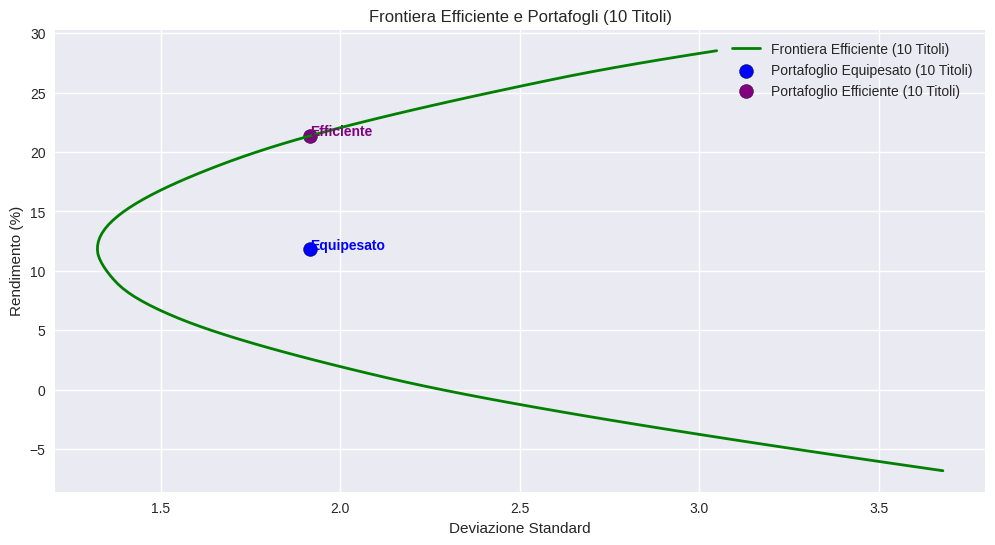

Statistiche Portafoglio sulla Frontiera Efficiente (10 Titoli):
Rendimento atteso: 21.38%
Deviazione standard: 1.92%
Sharpe Ratio: 9.71
Pesi assegnati ai titoli (%):
ASML: 39.56%
SAN.PA: 0.00%
TTE: 0.00%
MC.PA: 32.66%
REP.MC: 0.00%
VOW3.DE: 0.00%
TIT.MI: 0.00%
AD.AS: 27.78%
MT.AS: 0.00%
SIE.DE: 0.00%


In [ ]:
selected_tickers_10 = ['ASML', 'SAN.PA', 'TTE', 'MC.PA', 'REP.MC', 'VOW3.DE', 'TIT.MI', 'AD.AS', 'MT.AS', 'SIE.DE']

# Scarica dati
df = yf.download(selected_tickers_10, start="2015-03-01", end="2025-03-01", interval="1mo", auto_adjust=True)
df_close = df['Close'].ffill()
selected_tickers_10 = [t for t in selected_tickers_10 if t in df_close.columns]
dati = df_close[selected_tickers_10]

# Calcolo rendimenti
rendimenti = dati.pct_change().dropna().iloc[-120:]  # Ultimi 10 anni
medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100
cov = rendimenti.cov() * 12 * 100
risk_free = 2.78  # Tasso privo di rischio

# Portafoglio equiponderato
w_eq_10 = np.ones(len(selected_tickers_10)) / len(selected_tickers_10)
rend_eq_10 = np.dot(medie, w_eq_10)
vol_eq_10 = np.sqrt(np.dot(w_eq_10, np.dot(cov, w_eq_10)))

# Funzione di ottimizzazione per la frontiera efficiente
def ottimizza_portafoglio(target_rendimento):
    def obiettivo(w):
        return np.sqrt(np.dot(w, np.dot(cov, w)))  # Minimizza la volatilità

    constraints = (
        {'type': 'eq', 'fun': lambda w: np.dot(medie, w) - target_rendimento},  # Rendimento target
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}  # Somma pesi = 1
    )
    bounds = [(0, 1)] * len(selected_tickers_10)  # Nessun peso negativo
    risultato = minimize(obiettivo, w_eq_10, bounds=bounds, constraints=constraints)

    return risultato.x if risultato.success else None

# Generazione della frontiera efficiente
rendimenti_efficienti_10 = np.linspace(min(medie), max(medie), 100)
volatilità_efficienti_10 = []
pesi_frontiera_10 = []

for r in rendimenti_efficienti_10:
    w_opt = ottimizza_portafoglio(r)
    if w_opt is not None:
        vol = np.sqrt(np.dot(w_opt, np.dot(cov, w_opt)))
        volatilità_efficienti_10.append(vol)
        pesi_frontiera_10.append(w_opt)
    else:
        volatilità_efficienti_10.append(np.nan)
        pesi_frontiera_10.append(None)

# Trova il portafoglio efficiente con la stessa volatilità di quello equiponderato
diff_min_10 = float("inf")
index_best_10 = None

for i, vol in enumerate(volatilità_efficienti_10):
    if abs(vol - vol_eq_10) < diff_min_10:  # Troviamo la volatilità più vicina a vol_eq
        diff_min_10 = abs(vol - vol_eq_10)
        index_best_10 = i

if index_best_10 is not None:
    w_eff_10 = pesi_frontiera_10[index_best_10]
    rend_eff_10 = rendimenti_efficienti_10[index_best_10]
else:
    w_eff_10 = None
    rend_eff_10 = None

# Plot della frontiera efficiente e dei portafogli
plt.figure(figsize=(12, 6))

# Scatter della frontiera efficiente
plt.plot(volatilità_efficienti_10, rendimenti_efficienti_10, label="Frontiera Efficiente (10 Titoli)", color="g", linewidth=2)

# Scatter del portafoglio equiponderato
plt.scatter(vol_eq_10, rend_eq_10, color="blue", s=100, edgecolors="black", label="Portafoglio Equipesato (10 Titoli)")
plt.annotate("Equipesato", xy=(vol_eq_10, rend_eq_10), xytext=(vol_eq_10+0.002, rend_eq_10), fontsize=10, weight="bold", color="blue")

# Scatter del portafoglio efficiente con stessa volatilità
if w_eff_10 is not None:
    plt.scatter(vol_eq_10, rend_eff_10, color="purple", s=100, edgecolors="black", label="Portafoglio Efficiente (10 Titoli)")
    plt.annotate("Efficiente", xy=(vol_eq_10, rend_eff_10), xytext=(vol_eq_10+0.002, rend_eff_10), fontsize=10, weight="bold", color="purple")

plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.title("Frontiera Efficiente e Portafogli (10 Titoli)")
plt.grid(True)
plt.show()

# Stampa delle statistiche
if w_eff_10 is not None:
    sharpe_eff_10 = (rend_eff_10 - risk_free) / vol_eq_10
    print("Statistiche Portafoglio sulla Frontiera Efficiente (10 Titoli):")
    print(f"Rendimento atteso: {rend_eff_10:.2f}%")
    print(f"Deviazione standard: {vol_eq_10:.2f}%")
    print(f"Sharpe Ratio: {sharpe_eff_10:.2f}")
    print("Pesi assegnati ai titoli (%):")
    for ticker, peso in zip(selected_tickers_10, w_eff_10 * 100):
        print(f"{ticker}: {peso:.2f}%")


GMV 10 titoli

[*********************100%***********************]  10 of 10 completed


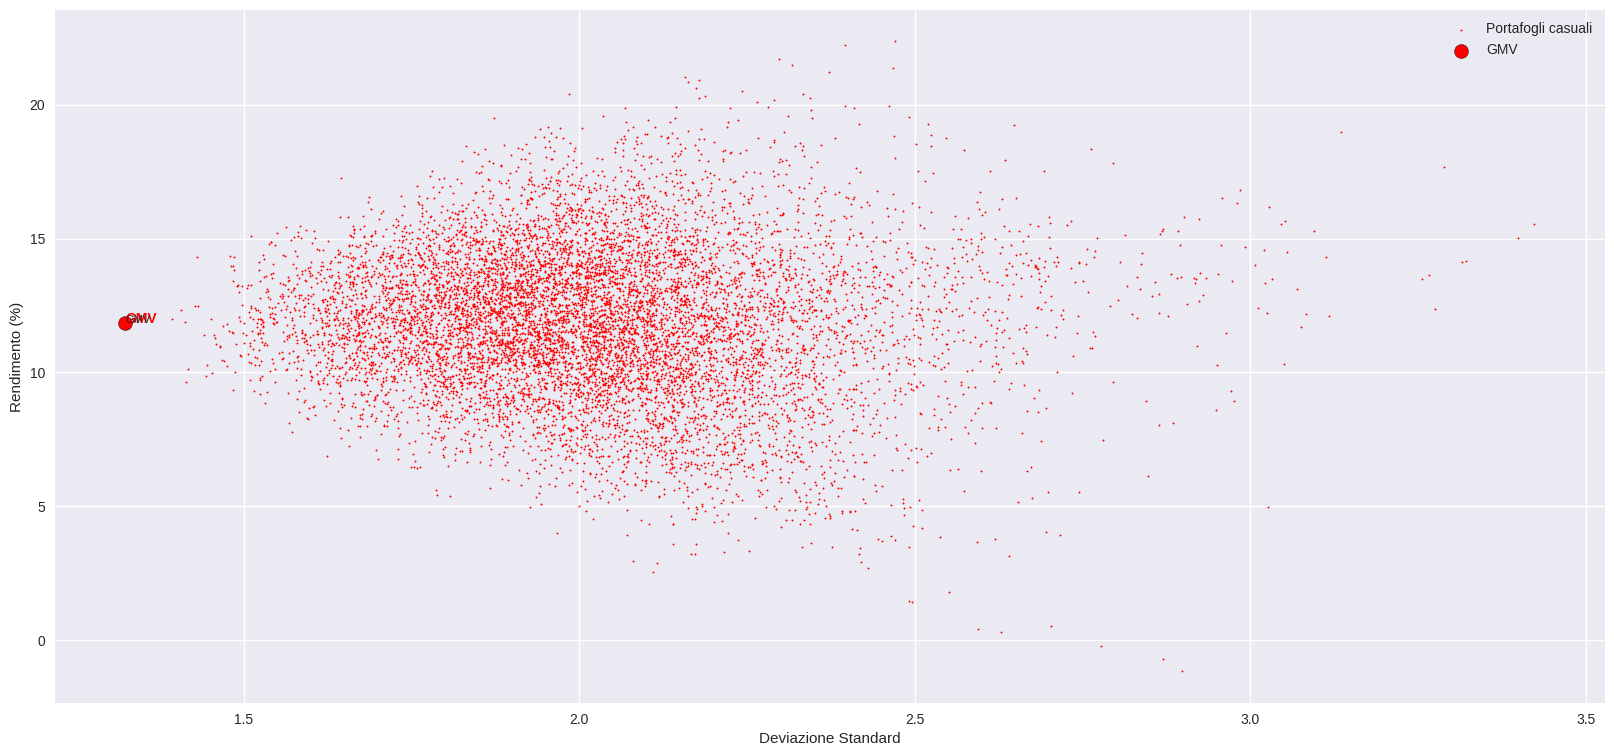

Statistiche Portafoglio GMV:
Rendimento atteso: 11.86%
Deviazione standard: 1.32%
Sharpe Ratio: 6.86
Pesi assegnati ai titoli (%):
ASML: 1.27%
SAN.PA: 29.41%
TTE: 13.53%
MC.PA: 12.85%
REP.MC: 0.65%
VOW3.DE: 0.00%
TIT.MI: 0.00%
AD.AS: 42.30%
MT.AS: 0.00%
SIE.DE: 0.00%


In [ ]:
tickers = ['ASML', 'SAN.PA', 'TTE', 'MC.PA', 'REP.MC', 'VOW3.DE', 'TIT.MI', 'AD.AS', 'MT.AS', 'SIE.DE']

df = yf.download(tickers, start="2015-03-01", end="2025-03-01", interval="1mo", auto_adjust=True)

df_close = df['Close'].ffill()

tickers = [t for t in tickers if t in df_close.columns]
dati = df_close[tickers]

rendimenti = dati.pct_change().dropna()
rendimenti = rendimenti.iloc[-120:]  # Ultimi 10 anni (10 * 12 mesi)

medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100

cov = rendimenti.cov() * 12 * 100

risk_free = 2.78

def min_volatilita(w, cov):
    return np.sqrt(np.dot(w.T, np.dot(cov, w)))  # Minimizza la deviazione standard

def somma_pesi(w):
    return np.sum(w) - 1

# Ottimizzazione del portafoglio GMV (Global Minimum Volatility)
n_assets = len(tickers)
w0 = np.ones(n_assets) / n_assets
constraints = {"type": "eq", "fun": somma_pesi}
bounds = [(0, 1) for _ in range(n_assets)]

result = minimize(min_volatilita, w0, args=(cov,), method="SLSQP", constraints=constraints, bounds=bounds)
w_gmv = result.x

rend_gmv = np.dot(medie, w_gmv)
vol_gmv = np.sqrt(np.dot(w_gmv.T, np.dot(cov, w_gmv)))
sharpe_gmv = (rend_gmv - risk_free) / vol_gmv

n_portafogli = 10000
pesi_random = np.random.dirichlet(np.ones(n_assets), n_portafogli)
rendimenti_random = np.dot(pesi_random, medie)
volatilità_random = np.sqrt(np.einsum('ij,jk,ik->i', pesi_random, cov, pesi_random))

tabella1 = pd.DataFrame(columns=["rendimento", "deviazione_standard", "Sharpe"] + tickers)
tabella1.loc["GMV"] = [rend_gmv, vol_gmv, sharpe_gmv] + list(w_gmv * 100)

plt.figure(figsize=(20, 9))

plt.scatter(volatilità_random, rendimenti_random, color="r", s=1, label="Portafogli casuali")

plt.scatter(vol_gmv, rend_gmv, color="red", s=100, edgecolors="black", label="GMV")
plt.annotate("GMV", xy=(vol_gmv, rend_gmv), size=10, weight="bold", color="red")

for i in tabella1.index:
    plt.annotate(i, xy=(tabella1.loc[i, "deviazione_standard"], tabella1.loc[i, "rendimento"]), size=8)

plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.show()

# Stampa statistiche del portafoglio GMV
print("Statistiche Portafoglio GMV:")
print(f"Rendimento atteso: {rend_gmv:.2f}%")
print(f"Deviazione standard: {vol_gmv:.2f}%")
print(f"Sharpe Ratio: {sharpe_gmv:.2f}")
print("Pesi assegnati ai titoli (%):")
for ticker, peso in zip(tickers, w_gmv * 100):
    print(f"{ticker}: {peso:.2f}%")


CONFRONTO EQUI E GMV 10 TITOLI

[*********************100%***********************]  10 of 10 completed


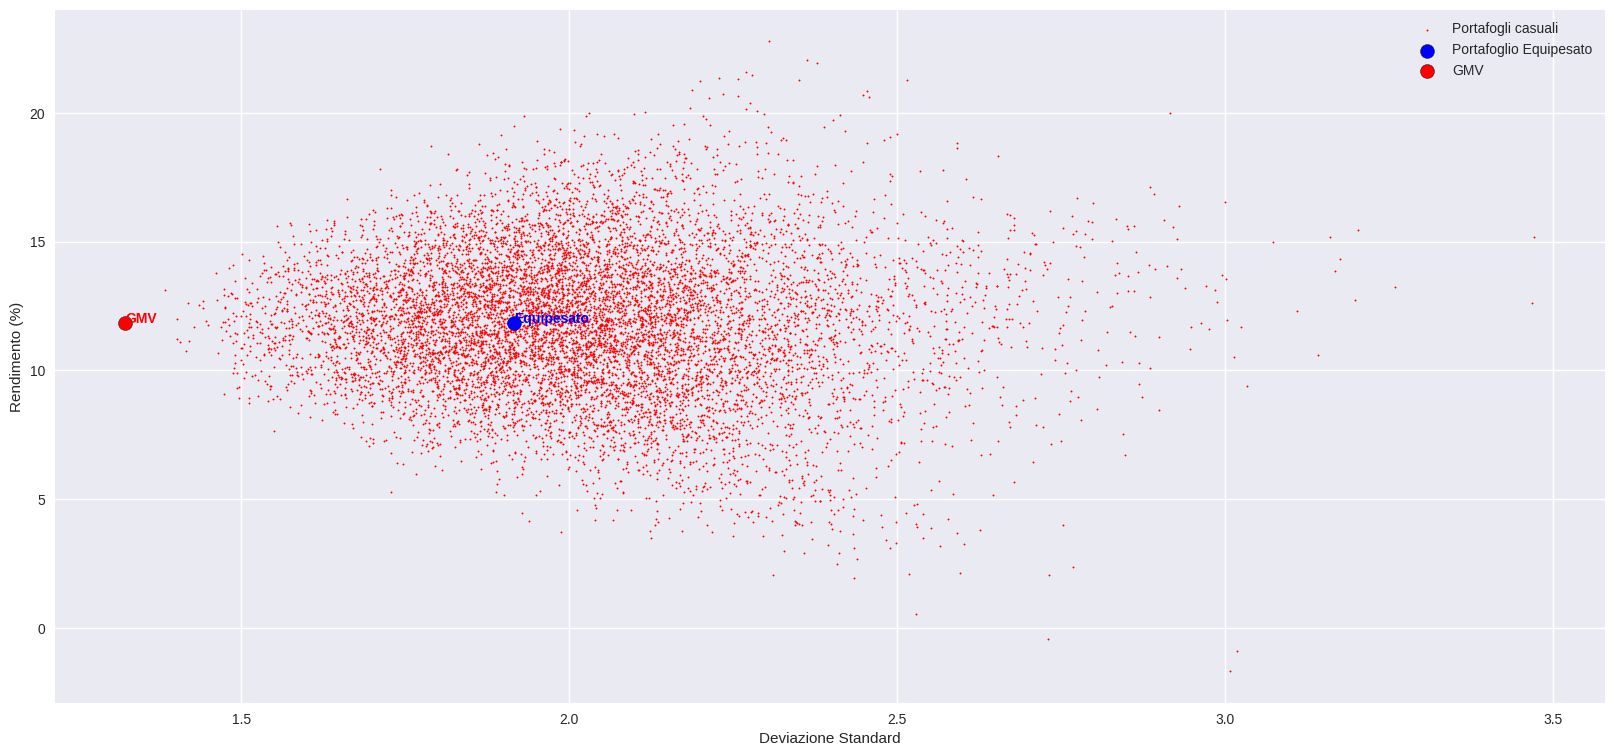

In [ ]:
tickers = ['ASML', 'SAN.PA', 'TTE', 'MC.PA', 'REP.MC', 'VOW3.DE', 'TIT.MI', 'AD.AS', 'MT.AS', 'SIE.DE']

df = yf.download(tickers, start="2015-03-01", end="2025-03-01", interval="1mo", auto_adjust=True)

df_close = df['Close'].ffill()

tickers = [t for t in tickers if t in df_close.columns]
dati = df_close[tickers]

rendimenti = dati.pct_change().dropna()
rendimenti = rendimenti.iloc[-120:]  # Ultimi 10 anni (10 * 12 mesi)

medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100

cov = rendimenti.cov() * 12 * 100

risk_free = 2.78  # Tasso risk-free

# Calcolo del portafoglio Equipesato
w_eq = np.ones(len(tickers)) / len(tickers)

rend_eq = np.dot(medie, w_eq)
vol_eq = np.sqrt(np.dot(w_eq, np.dot(cov, w_eq)))
sharpe_eq = (rend_eq - risk_free) / vol_eq

# Funzioni per ottimizzazione del portafoglio GMV
def min_volatilita(w, cov):
    return np.sqrt(np.dot(w.T, np.dot(cov, w)))  # Minimizza la deviazione standard

def somma_pesi(w):
    return np.sum(w) - 1

# Ottimizzazione del portafoglio GMV (Global Minimum Volatility)
n_assets = len(tickers)
w0 = np.ones(n_assets) / n_assets
constraints = {"type": "eq", "fun": somma_pesi}
bounds = [(0, 1) for _ in range(n_assets)]

result = minimize(min_volatilita, w0, args=(cov,), method="SLSQP", constraints=constraints, bounds=bounds)
w_gmv = result.x

rend_gmv = np.dot(medie, w_gmv)
vol_gmv = np.sqrt(np.dot(w_gmv.T, np.dot(cov, w_gmv)))
sharpe_gmv = (rend_gmv - risk_free) / vol_gmv

# Generazione di portafogli casuali
n_portafogli = 10000
pesi_random = np.random.dirichlet(np.ones(n_assets), n_portafogli)
rendimenti_random = np.dot(pesi_random, medie)
volatilità_random = np.sqrt(np.einsum('ij,jk,ik->i', pesi_random, cov, pesi_random))

# Creazione della tabella per portafogli
portafogli_df = pd.DataFrame({
    "rendimento": rendimenti_random,
    "deviazione_standard": volatilità_random
})

# Visualizzazione grafica
plt.figure(figsize=(20, 9))

# Scatter dei portafogli casuali
plt.scatter(volatilità_random, rendimenti_random, color="r", s=1, label="Portafogli casuali")

# Scatter del portafoglio Equipesato
plt.scatter(vol_eq, rend_eq, color="blue", s=100, edgecolors="black", label="Portafoglio Equipesato")
plt.annotate("Equipesato", xy=(vol_eq, rend_eq), size=10, weight="bold", color="blue")

# Scatter del portafoglio GMV
plt.scatter(vol_gmv, rend_gmv, color="red", s=100, edgecolors="black", label="GMV")
plt.annotate("GMV", xy=(vol_gmv, rend_gmv), size=10, weight="bold", color="red")

plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.show()

Equipesato 5 titoli

[*********************100%***********************]  5 of 5 completed


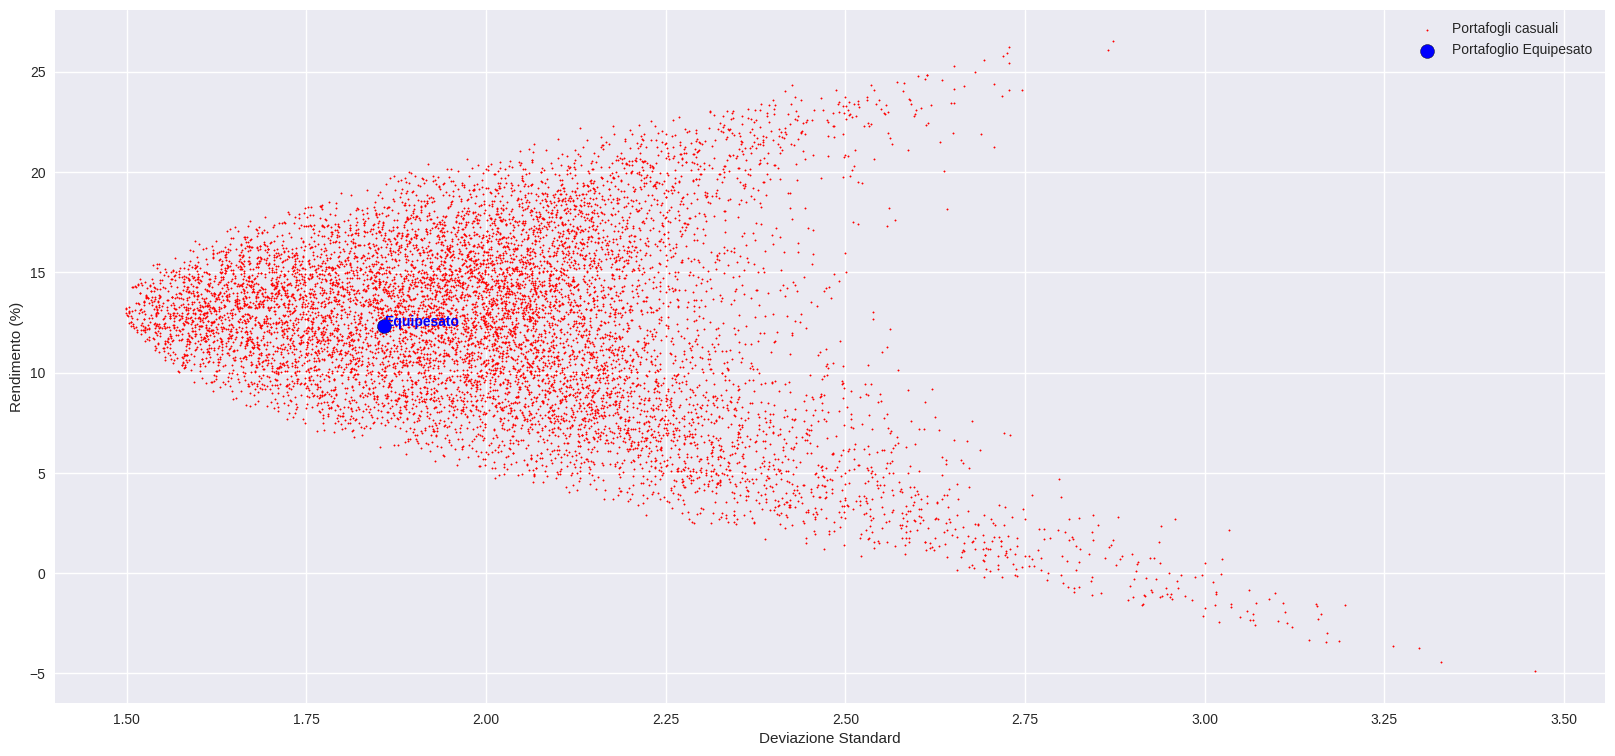

Statistiche Portafoglio Equipesato:
Rendimento atteso: 12.31%
Deviazione standard: 1.86%
Sharpe Ratio: 5.13
Pesi assegnati ai titoli (%):
ASML: 20.00%
TTE: 20.00%
AD.AS: 20.00%
TIT.MI: 20.00%
SIE.DE: 20.00%


In [ ]:
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']

df = yf.download(tickers, start="2015-03-01", end="2025-03-01", interval="1mo", auto_adjust=True)

df_close = df['Close'].ffill()

tickers = [t for t in tickers if t in df_close.columns]
dati = df_close[tickers]

rendimenti = dati.pct_change().dropna()
rendimenti = rendimenti.iloc[-120:]  # Ultimi 10 anni (10 * 12 mesi)

medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100

cov = rendimenti.cov() * 12 * 100

risk_free = 2.78  # Tasso risk-free

# Calcolo del portafoglio Equipesato
w_eq = np.ones(len(tickers)) / len(tickers)

rend_eq = np.dot(medie, w_eq)
vol_eq = np.sqrt(np.dot(w_eq, np.dot(cov, w_eq)))
sharpe_eq = (rend_eq - risk_free) / vol_eq

# Generazione di portafogli casuali
n_portafogli = 10000
pesi_random = np.random.dirichlet(np.ones(len(tickers)), n_portafogli)
rendimenti_random = np.dot(pesi_random, medie)
volatilità_random = np.sqrt(np.einsum('ij,jk,ik->i', pesi_random, cov, pesi_random))

# Creazione della tabella per portafogli
portafogli_df = pd.DataFrame({
    "rendimento": rendimenti_random,
    "deviazione_standard": volatilità_random
})

# Visualizzazione grafica
plt.figure(figsize=(20, 9))

# Scatter dei portafogli casuali
plt.scatter(volatilità_random, rendimenti_random, color="r", s=1, label="Portafogli casuali")

# Scatter del portafoglio Equipesato
plt.scatter(vol_eq, rend_eq, color="blue", s=100, edgecolors="black", label="Portafoglio Equipesato")
plt.annotate("Equipesato", xy=(vol_eq, rend_eq), size=10, weight="bold", color="blue")

plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.show()

# Stampa statistiche del portafoglio Equipesato
print("Statistiche Portafoglio Equipesato:")
print(f"Rendimento atteso: {rend_eq:.2f}%")
print(f"Deviazione standard: {vol_eq:.2f}%")
print(f"Sharpe Ratio: {sharpe_eq:.2f}")
print("Pesi assegnati ai titoli (%):")
for ticker, peso in zip(tickers, w_eq * 100):
    print(f"{ticker}: {peso:.2f}%")



Port. efficiente vs equipesato 5 titoli non efficiente (stessa dev. standard)


[*********************100%***********************]  5 of 5 completed


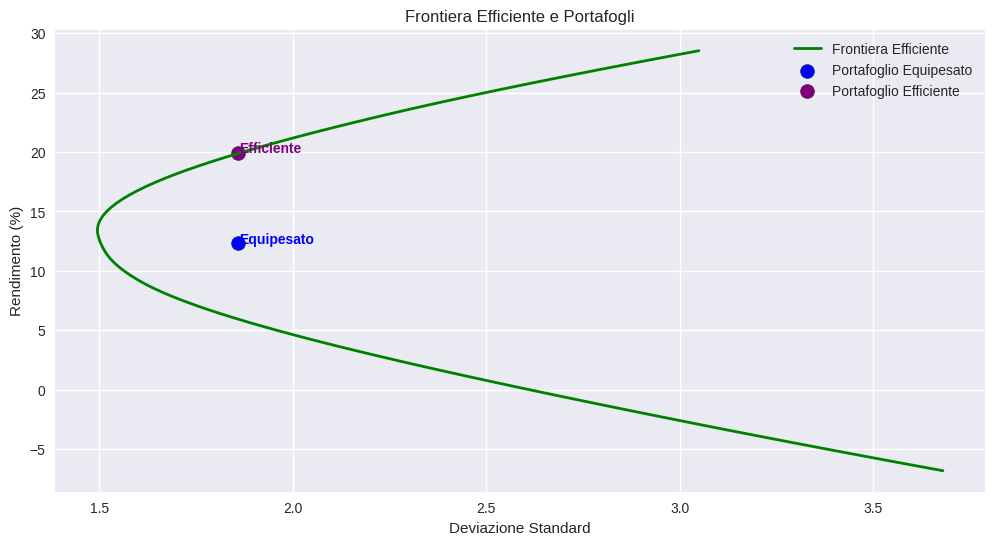

Statistiche Portafoglio sulla Frontiera Efficiente:
Rendimento atteso: 19.95%
Deviazione standard: 1.86%
Sharpe Ratio: 9.24
Pesi assegnati ai titoli (%):
ASML: 48.30%
TTE: 9.53%
AD.AS: 42.17%
TIT.MI: 0.00%
SIE.DE: 0.00%


In [ ]:
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']

# Scarica dati
df = yf.download(tickers, start="2015-03-01", end="2025-03-01", interval="1mo", auto_adjust=True)
df_close = df['Close'].ffill()
tickers = [t for t in tickers if t in df_close.columns]
dati = df_close[tickers]

# Calcolo rendimenti
rendimenti = dati.pct_change().dropna().iloc[-120:]  # Ultimi 10 anni
medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100
cov = rendimenti.cov() * 12 * 100
risk_free = 2.78  # Tasso privo di rischio

# Portafoglio equiponderato
w_eq = np.ones(len(tickers)) / len(tickers)
rend_eq = np.dot(medie, w_eq)
vol_eq = np.sqrt(np.dot(w_eq, np.dot(cov, w_eq)))

# Funzione di ottimizzazione per la frontiera efficiente
def ottimizza_portafoglio(target_rendimento):
    def obiettivo(w):
        return np.sqrt(np.dot(w, np.dot(cov, w)))  # Minimizza la volatilità

    constraints = (
        {'type': 'eq', 'fun': lambda w: np.dot(medie, w) - target_rendimento},  # Rendimento target
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}  # Somma pesi = 1
    )
    bounds = [(0, 1)] * len(tickers)  # Nessun peso negativo
    risultato = minimize(obiettivo, w_eq, bounds=bounds, constraints=constraints)

    return risultato.x if risultato.success else None

# Generazione della frontiera efficiente
rendimenti_efficienti = np.linspace(min(medie), max(medie), 100)
volatilità_efficienti = []
pesi_frontiera = []

for r in rendimenti_efficienti:
    w_opt = ottimizza_portafoglio(r)
    if w_opt is not None:
        vol = np.sqrt(np.dot(w_opt, np.dot(cov, w_opt)))
        volatilità_efficienti.append(vol)
        pesi_frontiera.append(w_opt)
    else:
        volatilità_efficienti.append(np.nan)
        pesi_frontiera.append(None)

# Trova il portafoglio efficiente con la stessa volatilità di quello equiponderato
diff_min = float("inf")
index_best = None

for i, vol in enumerate(volatilità_efficienti):
    if abs(vol - vol_eq) < diff_min:  # Troviamo la volatilità più vicina a vol_eq
        diff_min = abs(vol - vol_eq)
        index_best = i

if index_best is not None:
    w_eff = pesi_frontiera[index_best]
    rend_eff = rendimenti_efficienti[index_best]
else:
    w_eff = None
    rend_eff = None

# Plot della frontiera efficiente e dei portafogli
plt.figure(figsize=(12, 6))

# Scatter della frontiera efficiente
plt.plot(volatilità_efficienti, rendimenti_efficienti, label="Frontiera Efficiente", color="g", linewidth=2)

# Scatter del portafoglio equiponderato
plt.scatter(vol_eq, rend_eq, color="blue", s=100, edgecolors="black", label="Portafoglio Equipesato")
plt.annotate("Equipesato", xy=(vol_eq, rend_eq), xytext=(vol_eq+0.002, rend_eq), fontsize=10, weight="bold", color="blue")

# Scatter del portafoglio efficiente con stessa volatilità
if w_eff is not None:
    plt.scatter(vol_eq, rend_eff, color="purple", s=100, edgecolors="black", label="Portafoglio Efficiente")
    plt.annotate("Efficiente", xy=(vol_eq, rend_eff), xytext=(vol_eq+0.002, rend_eff), fontsize=10, weight="bold", color="purple")

plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.title("Frontiera Efficiente e Portafogli")
plt.grid(True)
plt.show()

# Stampa delle statistiche
if w_eff is not None:
    sharpe_eff = (rend_eff - risk_free) / vol_eq
    print("Statistiche Portafoglio sulla Frontiera Efficiente:")
    print(f"Rendimento atteso: {rend_eff:.2f}%")
    print(f"Deviazione standard: {vol_eq:.2f}%")
    print(f"Sharpe Ratio: {sharpe_eff:.2f}")
    print("Pesi assegnati ai titoli (%):")
    for ticker, peso in zip(tickers, w_eff * 100):
        print(f"{ticker}: {peso:.2f}%")

GMV 5 titoli

[*********************100%***********************]  5 of 5 completed


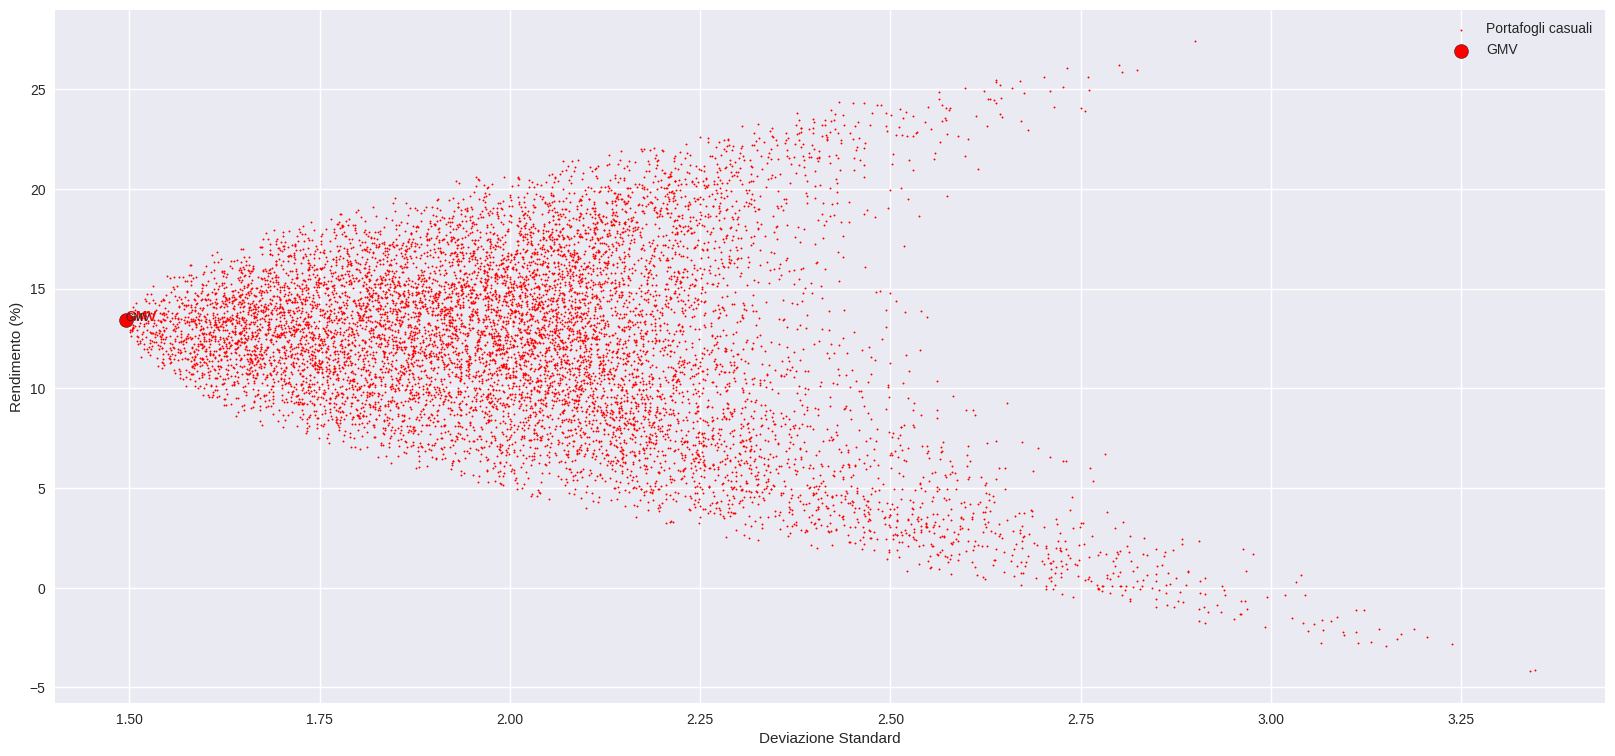

Statistiche Portafoglio GMV:
Rendimento atteso: 13.41%
Deviazione standard: 1.50%
Sharpe Ratio: 7.11
Pesi assegnati ai titoli (%):
ASML: 7.24%
TTE: 27.11%
AD.AS: 58.39%
TIT.MI: 0.00%
SIE.DE: 7.25%


In [ ]:
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']

df = yf.download(tickers, start="2015-03-01", end="2025-03-01", interval="1mo", auto_adjust=True)

df_close = df['Close'].ffill()

tickers = [t for t in tickers if t in df_close.columns]
dati = df_close[tickers]

rendimenti = dati.pct_change().dropna()
rendimenti = rendimenti.iloc[-120:]  # Ultimi 10 anni (10 * 12 mesi)

medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100

cov = rendimenti.cov() * 12 * 100

risk_free = 2.78

def min_volatilita(w, cov):
    return np.sqrt(np.dot(w.T, np.dot(cov, w)))  # Minimizza la deviazione standard

def somma_pesi(w):
    return np.sum(w) - 1

# Ottimizzazione del portafoglio GMV (Global Minimum Volatility)
n_assets = len(tickers)
w0 = np.ones(n_assets) / n_assets
constraints = {"type": "eq", "fun": somma_pesi}
bounds = [(0, 1) for _ in range(n_assets)]

result = minimize(min_volatilita, w0, args=(cov,), method="SLSQP", constraints=constraints, bounds=bounds)
w_gmv = result.x

rend_gmv = np.dot(medie, w_gmv)
vol_gmv = np.sqrt(np.dot(w_gmv.T, np.dot(cov, w_gmv)))
sharpe_gmv = (rend_gmv - risk_free) / vol_gmv

n_portafogli = 10000
pesi_random = np.random.dirichlet(np.ones(n_assets), n_portafogli)
rendimenti_random = np.dot(pesi_random, medie)
volatilità_random = np.sqrt(np.einsum('ij,jk,ik->i', pesi_random, cov, pesi_random))

tabella1 = pd.DataFrame(columns=["rendimento", "deviazione_standard", "Sharpe"] + tickers)
tabella1.loc["GMV"] = [rend_gmv, vol_gmv, sharpe_gmv] + list(w_gmv * 100)

plt.figure(figsize=(20, 9))

plt.scatter(volatilità_random, rendimenti_random, color="r", s=1, label="Portafogli casuali")

plt.scatter(vol_gmv, rend_gmv, color="red", s=100, edgecolors="black", label="GMV")
plt.annotate("GMV", xy=(vol_gmv, rend_gmv), size=10, weight="bold", color="red")

for i in tabella1.index:
    plt.annotate(i, xy=(tabella1.loc[i, "deviazione_standard"], tabella1.loc[i, "rendimento"]), size=8)

plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.show()

# Stampa statistiche del portafoglio GMV
print("Statistiche Portafoglio GMV:")
print(f"Rendimento atteso: {rend_gmv:.2f}%")
print(f"Deviazione standard: {vol_gmv:.2f}%")
print(f"Sharpe Ratio: {sharpe_gmv:.2f}")
print("Pesi assegnati ai titoli (%):")
for ticker, peso in zip(tickers, w_gmv * 100):
    print(f"{ticker}: {peso:.2f}%")


CONFRONTO EQUI E GMV 5 TITOLI

[*********************100%***********************]  5 of 5 completed


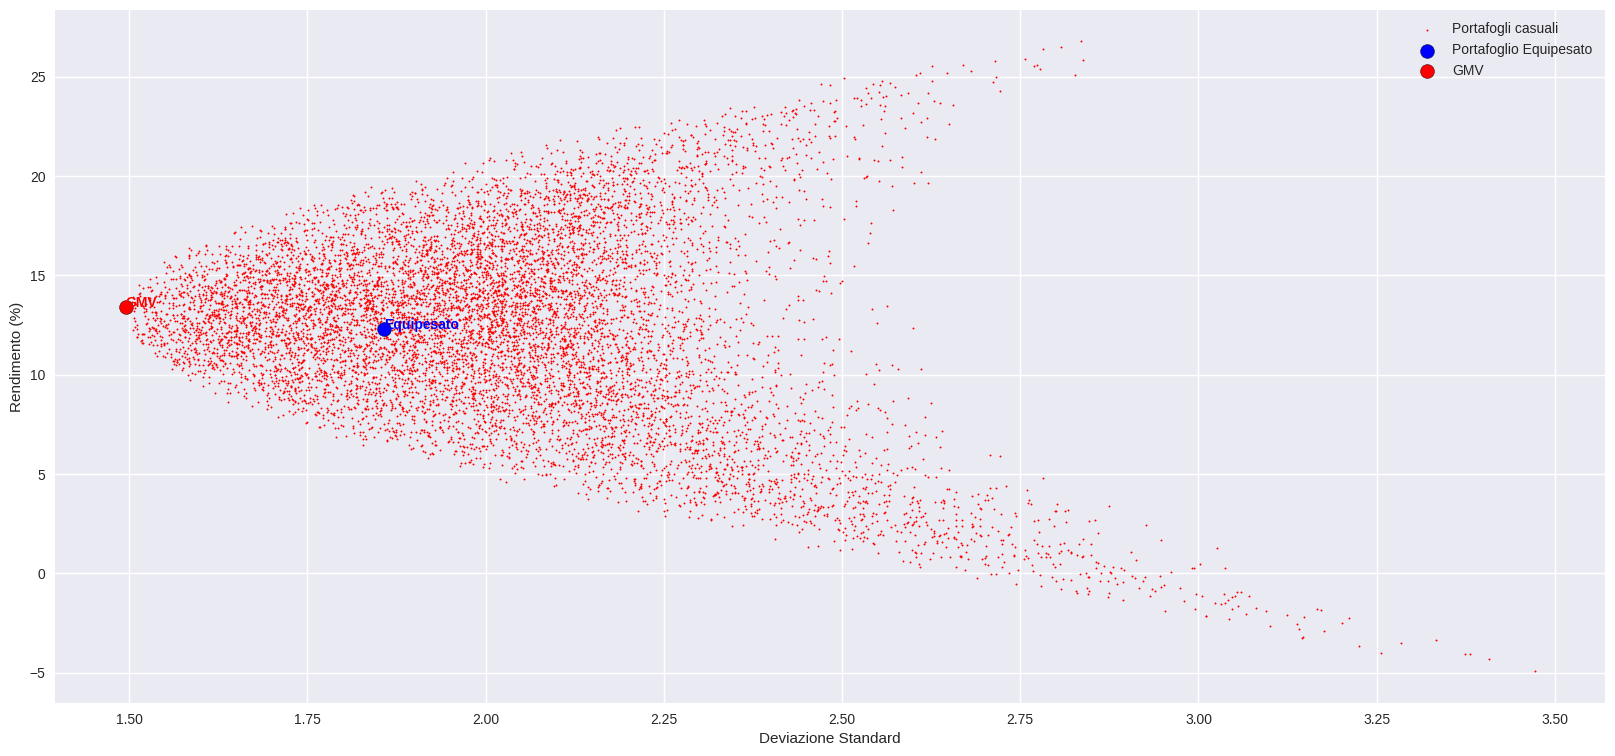

In [ ]:
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']

df = yf.download(tickers, start="2015-03-01", end="2025-03-01", interval="1mo", auto_adjust=True)

df_close = df['Close'].ffill()

tickers = [t for t in tickers if t in df_close.columns]
dati = df_close[tickers]

rendimenti = dati.pct_change().dropna()
rendimenti = rendimenti.iloc[-120:]  # Ultimi 10 anni (10 * 12 mesi)

medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100

cov = rendimenti.cov() * 12 * 100

risk_free = 2.78  # Tasso risk-free

# Calcolo del portafoglio Equipesato
w_eq = np.ones(len(tickers)) / len(tickers)

rend_eq = np.dot(medie, w_eq)
vol_eq = np.sqrt(np.dot(w_eq, np.dot(cov, w_eq)))
sharpe_eq = (rend_eq - risk_free) / vol_eq

# Funzioni per ottimizzazione del portafoglio GMV
def min_volatilita(w, cov):
    return np.sqrt(np.dot(w.T, np.dot(cov, w)))  # Minimizza la deviazione standard

def somma_pesi(w):
    return np.sum(w) - 1

# Ottimizzazione del portafoglio GMV (Global Minimum Volatility)
n_assets = len(tickers)
w0 = np.ones(n_assets) / n_assets
constraints = {"type": "eq", "fun": somma_pesi}
bounds = [(0, 1) for _ in range(n_assets)]

result = minimize(min_volatilita, w0, args=(cov,), method="SLSQP", constraints=constraints, bounds=bounds)
w_gmv = result.x

rend_gmv = np.dot(medie, w_gmv)
vol_gmv = np.sqrt(np.dot(w_gmv.T, np.dot(cov, w_gmv)))
sharpe_gmv = (rend_gmv - risk_free) / vol_gmv

# Generazione di portafogli casuali
n_portafogli = 10000
pesi_random = np.random.dirichlet(np.ones(n_assets), n_portafogli)
rendimenti_random = np.dot(pesi_random, medie)
volatilità_random = np.sqrt(np.einsum('ij,jk,ik->i', pesi_random, cov, pesi_random))

# Creazione della tabella per portafogli
portafogli_df = pd.DataFrame({
    "rendimento": rendimenti_random,
    "deviazione_standard": volatilità_random
})

# Visualizzazione grafica
plt.figure(figsize=(20, 9))

# Scatter dei portafogli casuali
plt.scatter(volatilità_random, rendimenti_random, color="r", s=1, label="Portafogli casuali")

# Scatter del portafoglio Equipesato
plt.scatter(vol_eq, rend_eq, color="blue", s=100, edgecolors="black", label="Portafoglio Equipesato")
plt.annotate("Equipesato", xy=(vol_eq, rend_eq), size=10, weight="bold", color="blue")

# Scatter del portafoglio GMV
plt.scatter(vol_gmv, rend_gmv, color="red", s=100, edgecolors="black", label="GMV")
plt.annotate("GMV", xy=(vol_gmv, rend_gmv), size=10, weight="bold", color="red")

plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.legend()
plt.show()


Portafogli target (no vendite allo scoperto)

[*********************100%***********************]  5 of 5 completed
<ipython-input-26-b2cff148a1a4>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_close_monthly = df_close.resample('M').last()


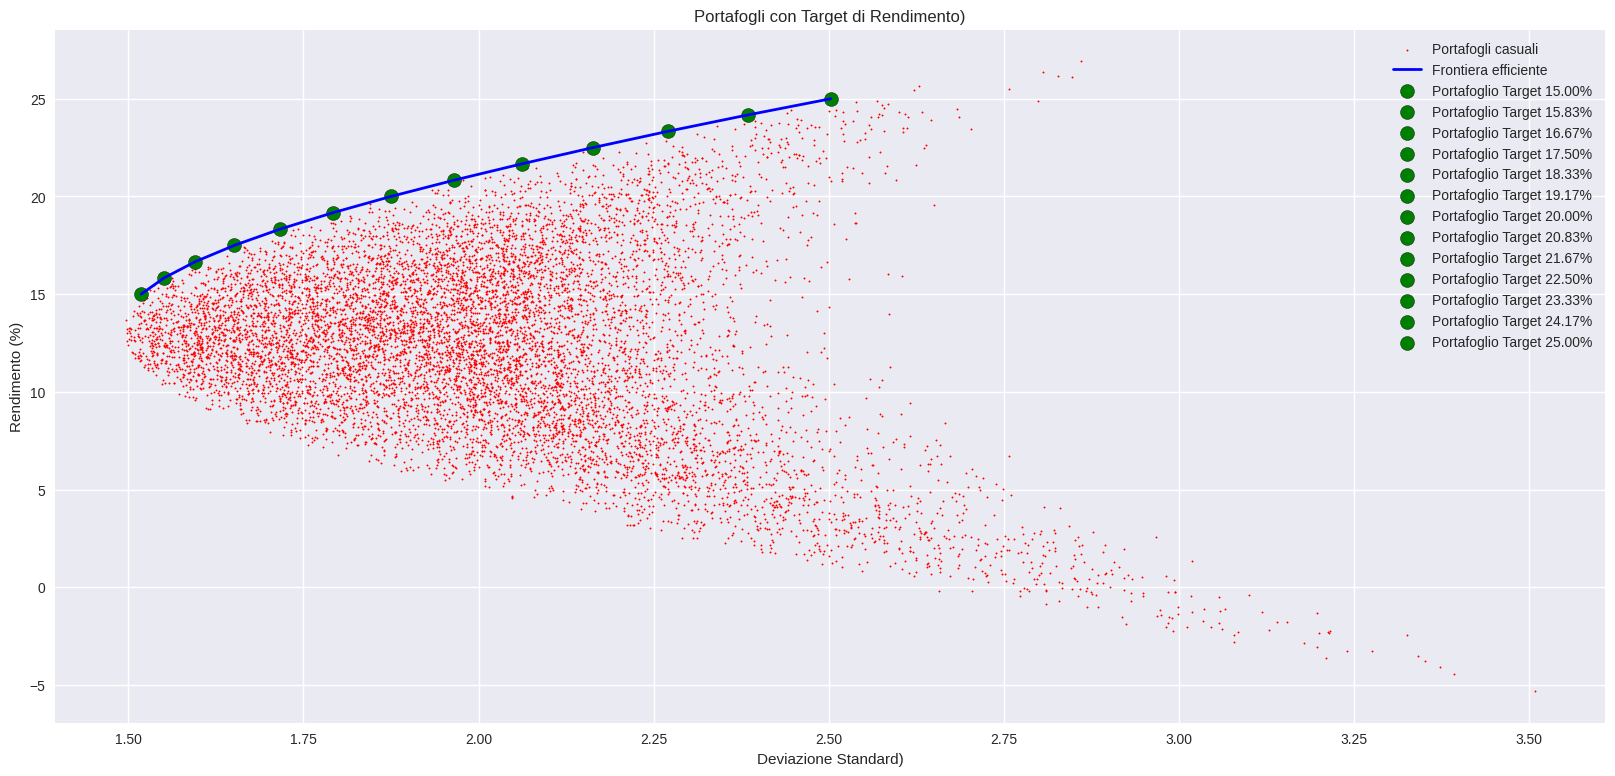

Pesi del portafoglio 1 con rendimento target del 15.00%:
        Pesi (%)
ASML       54.19
TTE        17.61
AD.AS       5.65
TIT.MI      0.00
SIE.DE     22.56

Portafoglio 1 con rendimento target del 15.00%:
Rendimento: 15.00%
Deviazione Standard: 1.52%
Sharpe Ratio: 8.05

Pesi del portafoglio 2 con rendimento target del 15.83%:
        Pesi (%)
ASML       52.51
TTE        22.98
AD.AS       4.02
TIT.MI      0.00
SIE.DE     20.49

Portafoglio 2 con rendimento target del 15.83%:
Rendimento: 15.83%
Deviazione Standard: 1.55%
Sharpe Ratio: 8.42

Pesi del portafoglio 3 con rendimento target del 16.67%:
        Pesi (%)
ASML       50.82
TTE        28.35
AD.AS       2.41
TIT.MI      0.00
SIE.DE     18.42

Portafoglio 3 con rendimento target del 16.67%:
Rendimento: 16.67%
Deviazione Standard: 1.60%
Sharpe Ratio: 8.70

Pesi del portafoglio 4 con rendimento target del 17.50%:
        Pesi (%)
ASML       49.14
TTE        33.74
AD.AS       0.75
TIT.MI      0.00
SIE.DE     16.37

Portafoglio 4 con 

In [ ]:
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']

df = yf.download(selected_tickers, start="2015-03-01", end="2025-03-01", auto_adjust=True)
df_close = df['Close'].ffill()

# Calcolo dei rendimenti mensili
df_close_monthly = df_close.resample('M').last()
rendimenti = df_close_monthly.pct_change().dropna()

# Calcolo dei rendimenti e covarianza annualizzati (12 mesi all'anno)
medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100
cov = rendimenti.cov() * 12 * 100
n_assets = len(selected_tickers)
rf = 2.78  # Tasso risk-free

# Funzioni per il portafoglio
def min_varianza(w, cov):
    return np.dot(w.T, np.dot(cov, w))

def rendimento(w, medie):
    return np.dot(w, medie)

def ottimizza_portafoglio_target(rendimento_target, medie, cov, n_assets):
    def obiettivo(w):
        return min_varianza(w, cov)

    def vincolo_rendimento(w):
        return rendimento(w, medie) - rendimento_target

    def vincolo_somma(w):
        return np.sum(w) - 1

    w0 = np.ones(n_assets) / n_assets  # Pesi iniziali uguali
    cons = ({'type': 'eq', 'fun': vincolo_rendimento},
            {'type': 'eq', 'fun': vincolo_somma})
    bounds = [(0, 1) for _ in range(n_assets)]

    result = minimize(obiettivo, w0, bounds=bounds, constraints=cons)
    return result.x if result.success else None

# Definizione dei target di rendimento
rendimento_targets = np.linspace(15, 25, 13)
portafogli_target = []

for rendimento_target in rendimento_targets:
    w_target = ottimizza_portafoglio_target(rendimento_target, medie, cov, n_assets)
    if w_target is not None:
        rend_target = rendimento(w_target, medie)
        vol_target = np.sqrt(np.dot(w_target.T, np.dot(cov, w_target)))  # Deviazione standard mensile
        sharpe_ratio = (rend_target - rf) / vol_target
        portafogli_target.append((vol_target, rend_target, sharpe_ratio, w_target))

# Generazione di 10.000 portafogli casuali
n_portafogli = 10000
pesi_random = np.random.dirichlet(np.ones(n_assets), size=n_portafogli)
rendimenti_random = np.dot(pesi_random, medie)
deviazione_standard_random = np.sqrt(np.einsum('ij,jk,ik->i', pesi_random, cov, pesi_random))

# Creazione del grafico
plt.figure(figsize=(20, 9))
plt.scatter(deviazione_standard_random, rendimenti_random, color="r", s=1, label="Portafogli casuali")

# Ordinamento e tracciamento della frontiera efficiente
portafogli_target.sort()
deviazione_standard_frontiera = [pt[0] for pt in portafogli_target]
rendimenti_frontiera = [pt[1] for pt in portafogli_target]
plt.plot(deviazione_standard_frontiera, rendimenti_frontiera, color="b", linewidth=2, label="Frontiera efficiente")

# Aggiunta dei portafogli target al grafico
for vol_target, rend_target, sharpe_ratio, _ in portafogli_target:
    plt.scatter(vol_target, rend_target, color="g", s=100, edgecolors="black", label=f"Portafoglio Target {rend_target:.2f}%")

# Etichette e legenda
plt.xlabel("Deviazione Standard)")
plt.ylabel("Rendimento (%)")
plt.title("Portafogli con Target di Rendimento)")
plt.legend()
plt.grid(True)
plt.show()

# Stampa delle informazioni per ogni portafoglio target
for i, (vol_target, rend_target, sharpe_ratio, w_target) in enumerate(portafogli_target):
    portafoglio_target_df = pd.DataFrame((w_target * 100).round(2), index=tickers, columns=["Pesi (%)"])  # Limita la precisione a 2 decimali
    print(f"Pesi del portafoglio {i+1} con rendimento target del {rend_target:.2f}%:")
    print(portafoglio_target_df)
    print(f"\nPortafoglio {i+1} con rendimento target del {rend_target:.2f}%:")
    print(f"Rendimento: {rend_target:.2f}%")
    print(f"Deviazione Standard: {vol_target:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}\n")

Portafogli target (con vendite allo scoperto)

[*********************100%***********************]  5 of 5 completed
<ipython-input-27-5d7d8c9471ea>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_close_monthly = df_close.resample('M').last()


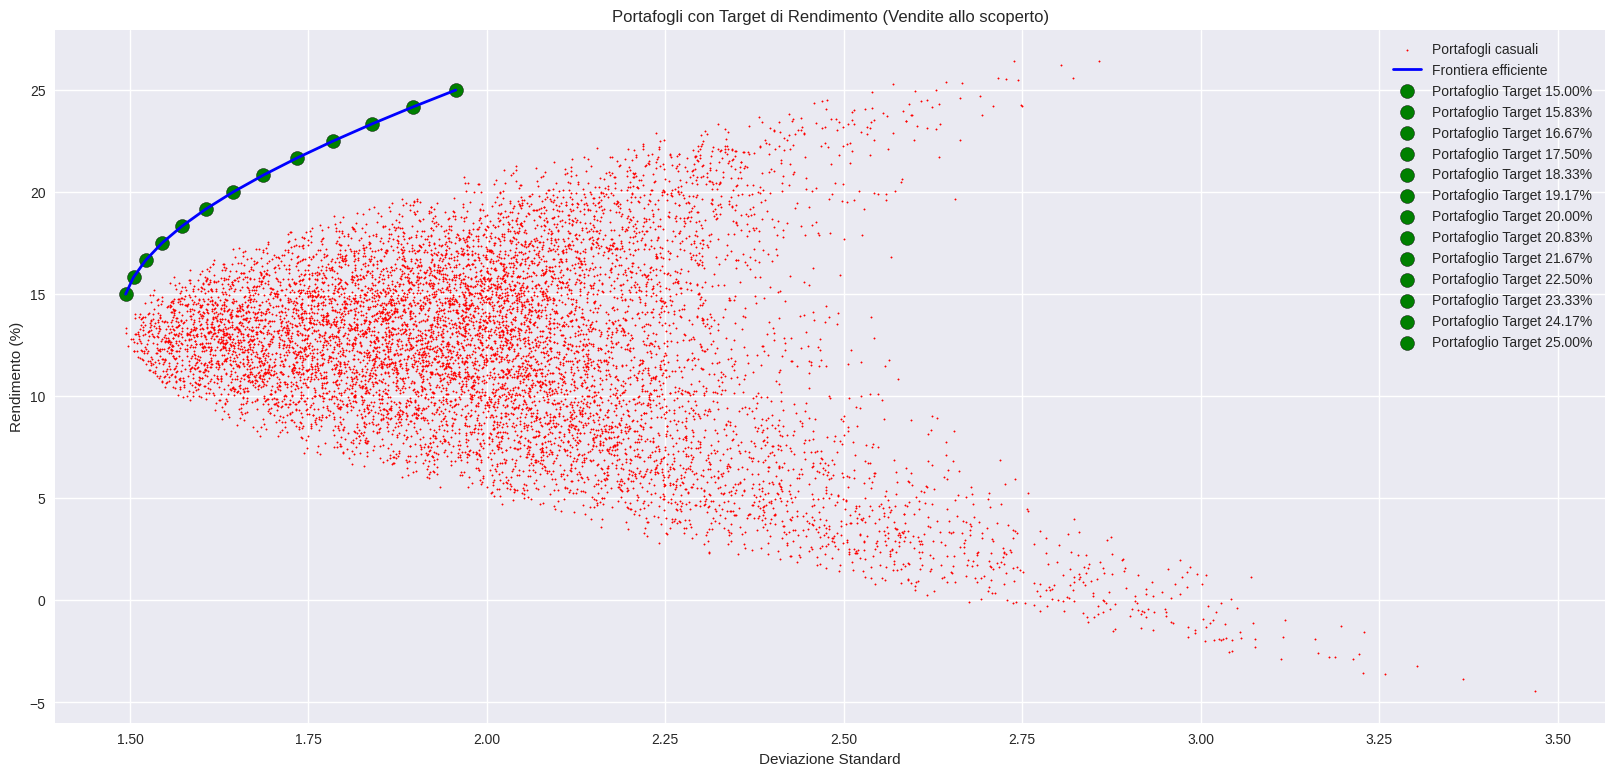

Pesi del portafoglio 1 con rendimento target del 15.00%:
        Pesi (%)
ASML       58.42
TTE        10.27
AD.AS       9.83
TIT.MI     -5.65
SIE.DE     27.13

Portafoglio 1 con rendimento target del 15.00%:
Rendimento: 15.00%
Deviazione Standard: 1.49%
Sharpe Ratio: 8.18

Pesi del portafoglio 2 con rendimento target del 15.83%:
        Pesi (%)
ASML       58.37
TTE        12.81
AD.AS       9.81
TIT.MI     -7.83
SIE.DE     26.83

Portafoglio 2 con rendimento target del 15.83%:
Rendimento: 15.83%
Deviazione Standard: 1.51%
Sharpe Ratio: 8.67

Pesi del portafoglio 3 con rendimento target del 16.67%:
        Pesi (%)
ASML       58.32
TTE        15.36
AD.AS       9.80
TIT.MI    -10.01
SIE.DE     26.53

Portafoglio 3 con rendimento target del 16.67%:
Rendimento: 16.67%
Deviazione Standard: 1.52%
Sharpe Ratio: 9.12

Pesi del portafoglio 4 con rendimento target del 17.50%:
        Pesi (%)
ASML       58.25
TTE        17.91
AD.AS       9.79
TIT.MI    -12.19
SIE.DE     26.23

Portafoglio 4 con 

In [ ]:
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']

# Download dei dati mensili per 10 anni
df = yf.download(tickers, start="2015-03-01", end="2025-03-01", auto_adjust=True)
df_close = df['Close'].ffill()

# Calcolo dei rendimenti mensili
df_close_monthly = df_close.resample('M').last()
rendimenti = df_close_monthly.pct_change().dropna()

# Calcolo dei rendimenti e covarianza annualizzati (12 mesi all'anno)
medie = ((rendimenti.mean() + 1) ** 12 - 1) * 100
cov = rendimenti.cov() * 12 * 100
n_assets = len(tickers)
rf = 2.78  # Tasso risk-free

# Funzione per calcolare la varianza del portafoglio
def min_varianza(w, cov):
    return np.dot(w.T, np.dot(cov, w))

def rendimento(w, medie):
    return np.dot(w, medie)

def ottimizza_portafoglio_target(rendimento_target, medie, cov, n_assets):
    def obiettivo(w):
        return min_varianza(w, cov)

    def vincolo_rendimento(w):
        return rendimento(w, medie) - rendimento_target

    def vincolo_somma(w):
        return np.sum(w) - 1

    w0 = np.ones(n_assets) / n_assets  # Pesi iniziali uguali
    cons = ({'type': 'eq', 'fun': vincolo_rendimento},
            {'type': 'eq', 'fun': vincolo_somma})
    bounds = [(-np.inf, np.inf) for _ in range(n_assets)]  # Permette vendite allo scoperto

    result = minimize(obiettivo, w0, bounds=bounds, constraints=cons)
    return result.x if result.success else None

# Definizione dei target di rendimento
rendimento_targets = np.linspace(15, 25, 13)
portafogli_target = []

for rendimento_target in rendimento_targets:
    w_target = ottimizza_portafoglio_target(rendimento_target, medie, cov, n_assets)
    if w_target is not None:
        rend_target = rendimento(w_target, medie)
        vol_target = np.sqrt(np.dot(w_target.T, np.dot(cov, w_target)))  # Deviazione standard mensile
        sharpe_ratio = (rend_target - rf) / vol_target
        portafogli_target.append((vol_target, rend_target, sharpe_ratio, w_target))

# Generazione di 10.000 portafogli casuali
n_portafogli = 10000
pesi_random = np.random.dirichlet(np.ones(n_assets), size=n_portafogli)
rendimenti_random = np.dot(pesi_random, medie)
deviazione_standard_random = np.sqrt(np.einsum('ij,jk,ik->i', pesi_random, cov, pesi_random))

# Creazione del grafico
plt.figure(figsize=(20, 9))
plt.scatter(deviazione_standard_random, rendimenti_random, color="r", s=1, label="Portafogli casuali")

# Ordinamento e tracciamento della frontiera efficiente
portafogli_target.sort()
deviazione_standard_frontiera = [pt[0] for pt in portafogli_target]
rendimenti_frontiera = [pt[1] for pt in portafogli_target]
plt.plot(deviazione_standard_frontiera, rendimenti_frontiera, color="b", linewidth=2, label="Frontiera efficiente")

# Aggiunta dei portafogli target al grafico
for vol_target, rend_target, sharpe_ratio, _ in portafogli_target:
    plt.scatter(vol_target, rend_target, color="g", s=100, edgecolors="black", label=f"Portafoglio Target {rend_target:.2f}%")

# Etichette e legenda
plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.title("Portafogli con Target di Rendimento (Vendite allo scoperto)")
plt.legend()
plt.grid(True)
plt.show()

# Stampa delle informazioni per ogni portafoglio target
for i, (vol_target, rend_target, sharpe_ratio, w_target) in enumerate(portafogli_target):
    portafoglio_target_df = pd.DataFrame((w_target * 100).round(2), index=tickers, columns=["Pesi (%)"])  # Limita la precisione a 2 decimali
    print(f"Pesi del portafoglio {i+1} con rendimento target del {rend_target:.2f}%:")
    print(portafoglio_target_df)
    print(f"\nPortafoglio {i+1} con rendimento target del {rend_target:.2f}%:")
    print(f"Rendimento: {rend_target:.2f}%")
    print(f"Deviazione Standard: {vol_target:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}\n")

Port target VS Port mercato

[*********************100%***********************]  6 of 6 completed
<ipython-input-28-b74c61aac226>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_close_monthly = df_close.resample('M').last()


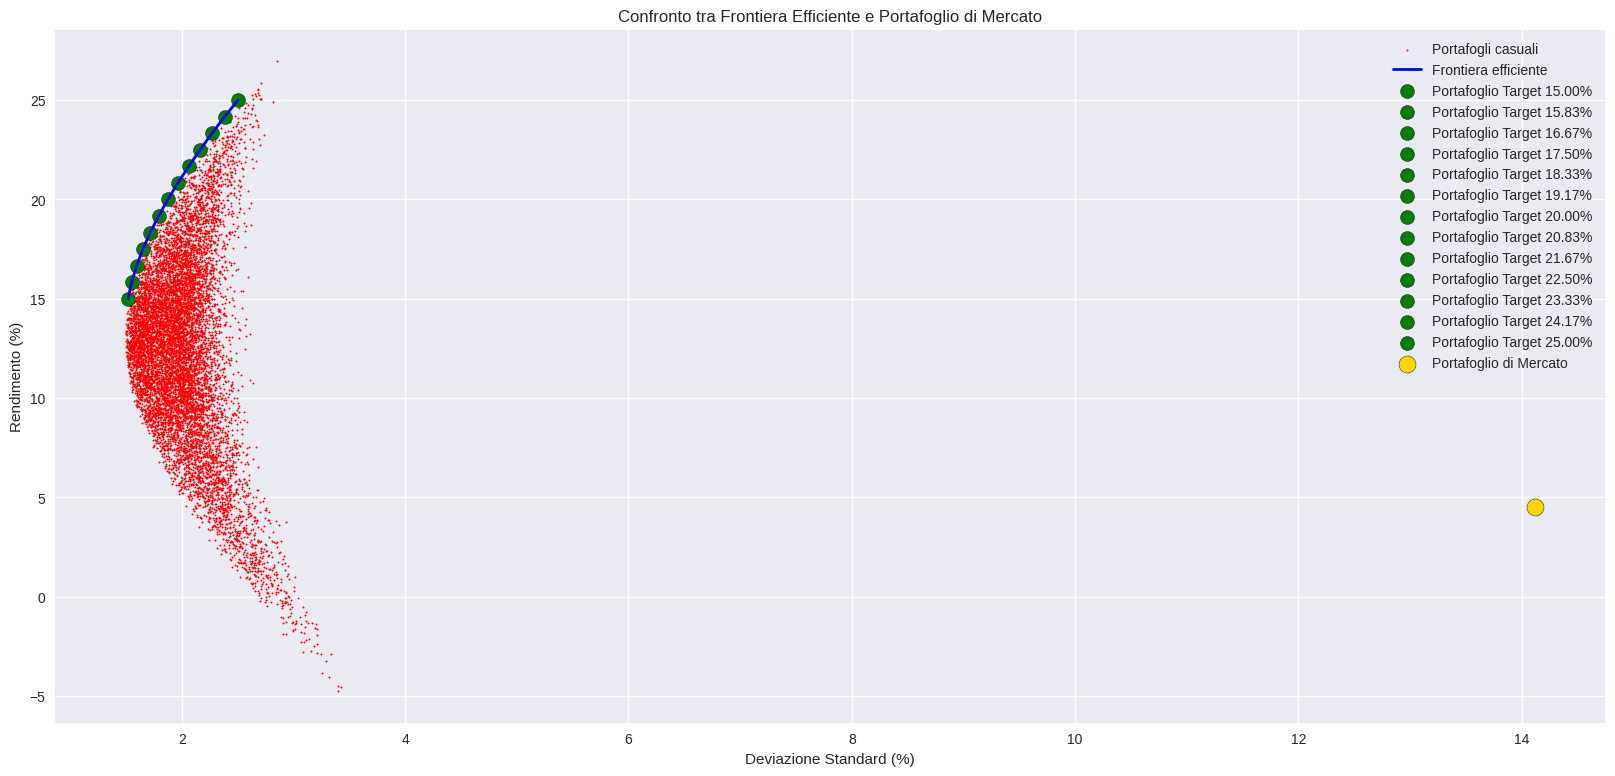

Pesi del portafoglio 1 con rendimento target del 15.00%:
        Pesi (%)
ASML       54.19
TTE        17.61
AD.AS       5.65
TIT.MI      0.00
SIE.DE     22.56

Portafoglio 1 con rendimento target del 15.00%:
Rendimento: 15.00%
Deviazione Standard: 1.52%
Sharpe Ratio: 8.05

Pesi del portafoglio 2 con rendimento target del 15.83%:
        Pesi (%)
ASML       52.51
TTE        22.98
AD.AS       4.02
TIT.MI      0.00
SIE.DE     20.49

Portafoglio 2 con rendimento target del 15.83%:
Rendimento: 15.83%
Deviazione Standard: 1.55%
Sharpe Ratio: 8.42

Pesi del portafoglio 3 con rendimento target del 16.67%:
        Pesi (%)
ASML       50.82
TTE        28.35
AD.AS       2.41
TIT.MI      0.00
SIE.DE     18.42

Portafoglio 3 con rendimento target del 16.67%:
Rendimento: 16.67%
Deviazione Standard: 1.60%
Sharpe Ratio: 8.70

Pesi del portafoglio 4 con rendimento target del 17.50%:
        Pesi (%)
ASML       49.14
TTE        33.74
AD.AS       0.75
TIT.MI      0.00
SIE.DE     16.37

Portafoglio 4 con 

In [ ]:
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']
market_ticker = '^STOXX'  # STOXX 600

# Download dei dati storici
df = yf.download(tickers + [market_ticker], start="2015-03-01", end="2025-03-01", auto_adjust=True)
df_close = df['Close'].ffill()

df_close_monthly = df_close.resample('M').last()
rendimenti = df_close_monthly.pct_change().dropna()

# Separare i rendimenti del mercato
rendimenti_market = rendimenti[market_ticker]
rendimenti_assets = rendimenti.drop(columns=[market_ticker])

# Calcolo dei rendimenti e covarianza annualizzati
medie = ((rendimenti_assets.mean() + 1) ** 12 - 1) * 100
cov = rendimenti_assets.cov() * 12 * 100

# Statistiche del mercato
rendimento_market_annuo = ((rendimenti_market.mean() + 1) ** 12 - 1) * 100
dev_market_annuo = rendimenti_market.std() * np.sqrt(12) * 100

rf = 2.78  # Tasso risk-free
n_assets = len(tickers)

# Funzioni per il portafoglio
def min_varianza(w, cov):
    return np.dot(w.T, np.dot(cov, w))

def rendimento(w, medie):
    return np.dot(w, medie)

def ottimizza_portafoglio_target(rendimento_target, medie, cov, n_assets):
    def obiettivo(w):
        return min_varianza(w, cov)

    def vincolo_rendimento(w):
        return rendimento(w, medie) - rendimento_target

    def vincolo_somma(w):
        return np.sum(w) - 1

    w0 = np.ones(n_assets) / n_assets  # Pesi iniziali uguali
    cons = ({'type': 'eq', 'fun': vincolo_rendimento},
            {'type': 'eq', 'fun': vincolo_somma})
    bounds = [(0, 1) for _ in range(n_assets)]

    result = minimize(obiettivo, w0, bounds=bounds, constraints=cons)
    return result.x if result.success else None

# Definizione dei target di rendimento
rendimento_targets = np.linspace(15, 25, 13)
portafogli_target = []

for rendimento_target in rendimento_targets:
    w_target = ottimizza_portafoglio_target(rendimento_target, medie, cov, n_assets)
    if w_target is not None:
        rend_target = rendimento(w_target, medie)
        vol_target = np.sqrt(min_varianza(w_target, cov))  # Deviazione standard annuale
        sharpe_ratio = (rend_target - rf) / vol_target
        portafogli_target.append((vol_target, rend_target, sharpe_ratio, w_target))

# Generazione di 10.000 portafogli casuali
n_portafogli = 10000
pesi_random = np.random.dirichlet(np.ones(n_assets), size=n_portafogli)
rendimenti_random = np.dot(pesi_random, medie)
deviazione_standard_random = np.sqrt(np.einsum('ij,jk,ik->i', pesi_random, cov, pesi_random))

# Creazione del grafico
plt.figure(figsize=(20, 9))
plt.scatter(deviazione_standard_random, rendimenti_random, color="r", s=1, label="Portafogli casuali")

# Ordinamento e tracciamento della frontiera efficiente
portafogli_target.sort()
deviazione_standard_frontiera = [pt[0] for pt in portafogli_target]
rendimenti_frontiera = [pt[1] for pt in portafogli_target]
plt.plot(deviazione_standard_frontiera, rendimenti_frontiera, color="b", linewidth=2, label="Frontiera efficiente")

# Aggiunta dei portafogli target al grafico
for vol_target, rend_target, sharpe_ratio, _ in portafogli_target:
    plt.scatter(vol_target, rend_target, color="g", s=100, edgecolors="black", label=f"Portafoglio Target {rend_target:.2f}%")

# Aggiunta del portafoglio di mercato
plt.scatter(dev_market_annuo, rendimento_market_annuo, color="gold", s=150, edgecolors="black", label="Portafoglio di Mercato")

# Etichette e legenda
plt.xlabel("Deviazione Standard (%)")
plt.ylabel("Rendimento (%)")
plt.title("Confronto tra Frontiera Efficiente e Portafoglio di Mercato")
plt.legend()
plt.grid(True)
plt.show()

# Stampa delle informazioni per ogni portafoglio target
for i, (vol_target, rend_target, sharpe_ratio, w_target) in enumerate(portafogli_target):
    portafoglio_target_df = pd.DataFrame((w_target * 100).round(2), index=tickers, columns=["Pesi (%)"])  # Limita la precisione a 2 decimali
    print(f"Pesi del portafoglio {i+1} con rendimento target del {rend_target:.2f}%:")
    print(portafoglio_target_df)
    print(f"\nPortafoglio {i+1} con rendimento target del {rend_target:.2f}%:")
    print(f"Rendimento: {rend_target:.2f}%")
    print(f"Deviazione Standard: {vol_target:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}\n")

# Stampa informazioni del portafoglio di mercato
print("Portafoglio di Mercato (STOXX 600):")
print(f"Rendimento atteso: {rendimento_market_annuo:.2f}%")
print(f"Deviazione Standard: {dev_market_annuo:.2f}%")
print(f"Sharpe Ratio: {(rendimento_market_annuo - rf) / dev_market_annuo:.2f}")

Portafoglio di tangenza

[*********************100%***********************]  5 of 5 completed
<ipython-input-29-e7f858276710>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rendimenti = df_close.resample('M').last().pct_change().dropna()


Pesi ottimali del portafoglio di tangenza:
ASML: 0.4286
TTE: 0.4818
AD.AS: 0.0000
TIT.MI: 0.0000
SIE.DE: 0.0896

Rendimento atteso del portafoglio: 18.08%
Deviazione standard del portafoglio: 1.87%
Sharpe Ratio: 8.19

Allocazioni lungo la Capital Allocation Line (CAL):
Rischio target: 0.00 | Peso RF: 1.00 | Peso Tangency: 0.00 | Rendimento: 2.78%
Rischio target: 0.41 | Peso RF: 0.78 | Peso Tangency: 0.22 | Rendimento: 6.18%
Rischio target: 0.83 | Peso RF: 0.56 | Peso Tangency: 0.44 | Rendimento: 9.58%
Rischio target: 1.24 | Peso RF: 0.33 | Peso Tangency: 0.67 | Rendimento: 12.98%
Rischio target: 1.66 | Peso RF: 0.11 | Peso Tangency: 0.89 | Rendimento: 16.38%
Rischio target: 2.07 | Peso RF: 0.00 | Peso Tangency: 1.00 | Rendimento: 19.77%
Rischio target: 2.49 | Peso RF: 0.00 | Peso Tangency: 1.00 | Rendimento: 23.17%
Rischio target: 2.90 | Peso RF: 0.00 | Peso Tangency: 1.00 | Rendimento: 26.57%
Rischio target: 3.32 | Peso RF: 0.00 | Peso Tangency: 1.00 | Rendimento: 29.97%
Rischio targe

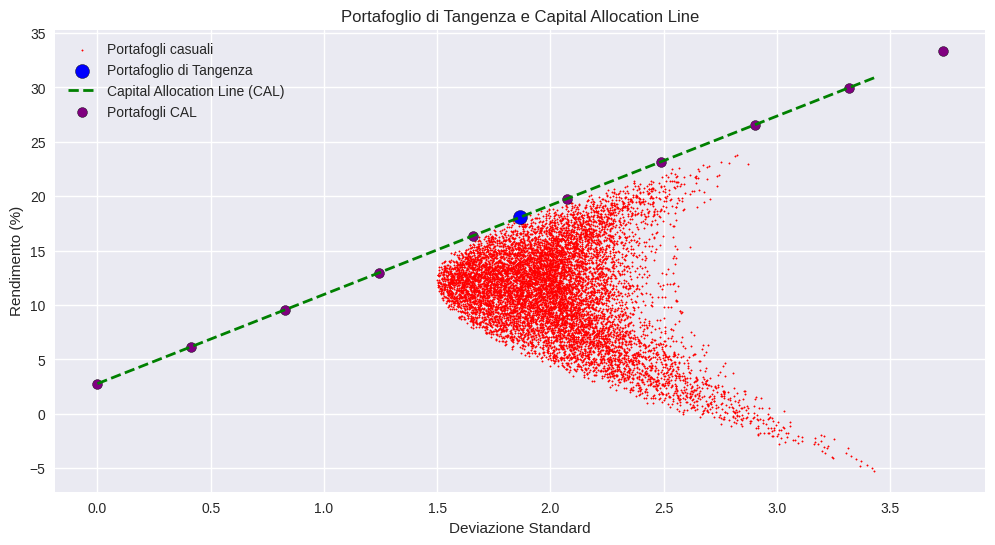

In [ ]:
# Tickers degli asset rischiosi
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']

# Scaricare i dati
start_date = "2015-03-01"
end_date = "2025-03-01"
df = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)
df_close = df['Close'].ffill()

# Calcolo dei rendimenti mensili
rendimenti = df_close.resample('M').last().pct_change().dropna()

# Statistiche dei rendimenti
medie = rendimenti.mean() * 12 * 100
cov = rendimenti.cov() * 12 * 100

n_assets = len(tickers)
rf = 2.78  # Tasso privo di rischio

# Funzioni per il calcolo di varianza, rendimento e Sharpe Ratio
def min_varianza(w, cov):
    return np.dot(w.T, np.dot(cov, w))

def rendimento(w, medie):
    return np.dot(w, medie)

def sharpe_ratio_negativo(w, medie, cov, rf):
    port_rend = rendimento(w, medie)
    port_std = np.sqrt(min_varianza(w, cov))
    return -((port_rend - rf) / port_std)  # Negativo per minimizzazione

# Ottimizzazione del portafoglio di tangenza
w0 = np.ones(n_assets) / n_assets
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1) for _ in range(n_assets)]
result = minimize(sharpe_ratio_negativo, w0, args=(medie, cov, rf), bounds=bounds, constraints=cons)

if result.success:
    w_tangency = result.x
    rendimento_tangency = rendimento(w_tangency, medie)
    deviazione_standard_tangency = np.sqrt(min_varianza(w_tangency, cov))
    sharpe_tangency = (rendimento_tangency - rf) / deviazione_standard_tangency

    # Simulazione dell'allocazione lungo la CAL
    rischio_target = np.linspace(0, 2 * deviazione_standard_tangency, 10)  # 10 livelli di rischio target
    w_rf = 1 - (rischio_target / deviazione_standard_tangency)  # Peso dell'asset risk-free
    w_rf = np.clip(w_rf, 0, 1)  # Evitiamo pesi negativi

    # Calcolo dei rendimenti lungo la CAL
    cal_rendimenti = rf + sharpe_tangency * rischio_target

    # Stampare statistiche e pesi del portafoglio di tangenza
    print("Pesi ottimali del portafoglio di tangenza:")
    for asset, peso in zip(tickers, w_tangency):
        print(f"{asset}: {peso:.4f}")
    print(f"\nRendimento atteso del portafoglio: {rendimento_tangency:.2f}%")
    print(f"Deviazione standard del portafoglio: {deviazione_standard_tangency:.2f}%")
    print(f"Sharpe Ratio: {sharpe_tangency:.2f}")

    print("\nAllocazioni lungo la Capital Allocation Line (CAL):")
    for i in range(len(rischio_target)):
        print(f"Rischio target: {rischio_target[i]:.2f} | Peso RF: {w_rf[i]:.2f} | Peso Tangency: {1 - w_rf[i]:.2f} | Rendimento: {cal_rendimenti[i]:.2f}%")

    # Generazione di portafogli casuali
    n_portafogli = 10000
    pesi_random = np.random.dirichlet(np.ones(n_assets), size=n_portafogli)
    rendimenti_random = np.dot(pesi_random, medie)
    deviazione_standard_random = np.sqrt(np.einsum('ij,jk,ik->i', pesi_random, cov, pesi_random))

    # Creazione della Capital Allocation Line (CAL)
    cal_x = np.linspace(0, max(deviazione_standard_random), 100)
    cal_y = rf + sharpe_tangency * cal_x

    # Grafico del portafoglio di tangenza
    plt.figure(figsize=(12, 6))
    plt.scatter(deviazione_standard_random, rendimenti_random, color="r", s=1, label="Portafogli casuali")
    plt.scatter(deviazione_standard_tangency, rendimento_tangency, color="b", s=100, edgecolors="black", label="Portafoglio di Tangenza")
    plt.plot(cal_x, cal_y, color="g", linewidth=2, linestyle='--', label="Capital Allocation Line (CAL)")

    # Evidenziare alcuni punti lungo la CAL
    for i in range(len(rischio_target)):
        plt.scatter(rischio_target[i], cal_rendimenti[i], color="purple", s=50, edgecolors="black", label="Portafogli CAL" if i == 0 else "")

    plt.xlabel("Deviazione Standard")
    plt.ylabel("Rendimento (%)")
    plt.title("Portafoglio di Tangenza e Capital Allocation Line")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    raise ValueError("Ottimizzazione fallita.")


Curve di indifferenza

[*********************100%***********************]  5 of 5 completed
<ipython-input-30-8a5d6ceaf2ba>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rendimenti = df_close.resample('M').last().pct_change().dropna()


Pesi Ottimali per i diversi livelli di avversione al rischio:
          Pesi (A=3)    Pesi (A=5)
ASML    3.449797e-01  4.499333e-01
TTE     6.550203e-01  4.359825e-01
AD.AS   0.000000e+00  3.111126e-13
TIT.MI  3.602812e-13  0.000000e+00
SIE.DE  0.000000e+00  1.140842e-01


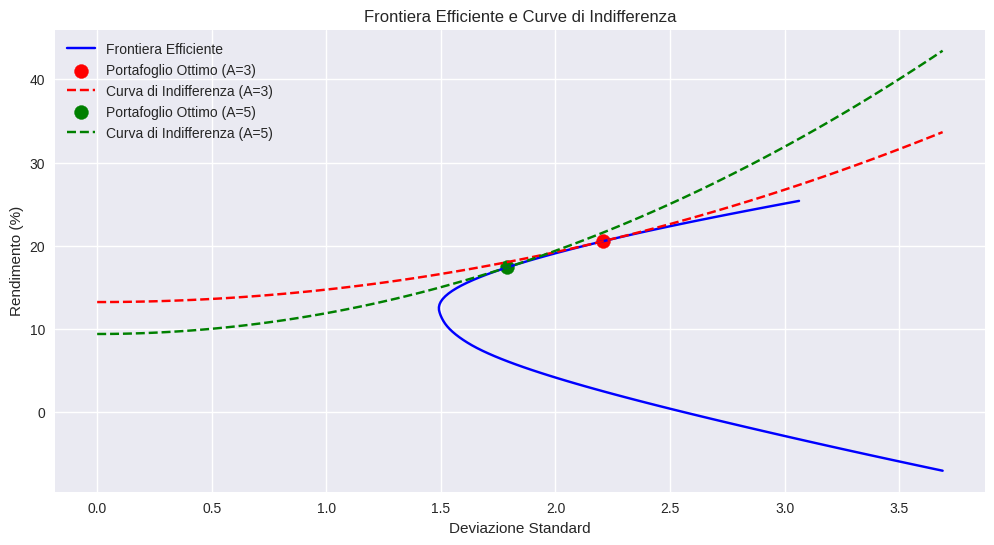

In [ ]:
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']

# Scaricare i dati
start_date = "2015-03-01"
end_date = "2025-03-01"
df = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)
df_close = df['Close'].ffill()

# Calcolo dei rendimenti mensili
rendimenti = df_close.resample('M').last().pct_change().dropna()

# Statistiche dei rendimenti
medie = rendimenti.mean() * 12 * 100
cov = rendimenti.cov() * 12 * 100

n_assets = len(tickers)
rf = 2.78  # Tasso privo di rischio

# Funzioni di utilità
def min_varianza(w, cov):
    return np.dot(w.T, np.dot(cov, w))

def rendimento(w, medie):
    return np.dot(w, medie)

def funzione_utilita(w, medie, cov, A):
    port_rend = rendimento(w, medie)
    port_risk = np.sqrt(min_varianza(w, cov))
    return -(port_rend - (A / 2) * (port_risk ** 2))

# Ottimizzazione per A=3 e A=5
A_values = [3, 5]
w0 = np.ones(n_assets) / n_assets
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1) for _ in range(n_assets)]
portafogli_ottimi = {}

for A in A_values:
    result = minimize(funzione_utilita, w0, args=(medie, cov, A), bounds=bounds, constraints=cons)
    if result.success:
        w_opt = result.x
        rend_opt = rendimento(w_opt, medie)
        risk_opt = np.sqrt(min_varianza(w_opt, cov))
        portafogli_ottimi[A] = (w_opt, rend_opt, risk_opt)

# Creazione del DataFrame con i pesi ottimali
pesi_df = pd.DataFrame({A: portafogli_ottimi[A][0] for A in A_values}, index=tickers)
pesi_df.columns = [f'Pesi (A={A})' for A in A_values]
print("Pesi Ottimali per i diversi livelli di avversione al rischio:")
print(pesi_df)

# Costruzione della frontiera efficiente
n_punti = 100
rendimenti_target = np.linspace(min(medie), max(medie), n_punti)
risk_eff = []

for r_target in rendimenti_target:
    cons_eff = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                {'type': 'eq', 'fun': lambda w: rendimento(w, medie) - r_target})
    result_eff = minimize(min_varianza, w0, args=(cov,), bounds=bounds, constraints=cons_eff)
    if result_eff.success:
        risk_eff.append(np.sqrt(result_eff.fun))
    else:
        risk_eff.append(np.nan)

# Grafico della frontiera efficiente e curve di indifferenza
plt.figure(figsize=(12, 6))
plt.plot(risk_eff, rendimenti_target, 'b-', label="Frontiera Efficiente")
colors = ['r', 'g']

for i, A in enumerate(A_values):
    w_opt, rend_opt, risk_opt = portafogli_ottimi[A]
    plt.scatter(risk_opt, rend_opt, color=colors[i], s=100, label=f"Portafoglio Ottimo (A={A})")

    # Curva di indifferenza
    risk_range = np.linspace(0, max(risk_eff), 100)
    util = rend_opt - (A / 2) * (risk_opt ** 2)
    indifferenza = util + (A / 2) * (risk_range ** 2)
    plt.plot(risk_range, indifferenza, colors[i]+'--', label=f"Curva di Indifferenza (A={A})")

plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.title("Frontiera Efficiente e Curve di Indifferenza")
plt.legend()
plt.grid(True)
plt.show()

Curve di indifferenza con Port. di tangenza

[*********************100%***********************]  5 of 5 completed
<ipython-input-31-675984357a71>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rendimenti = df_close.resample('M').last().pct_change().dropna()


Pesi ottimali del portafoglio di tangenza:
ASML: 0.4286
TTE: 0.4818
AD.AS: 0.0000
TIT.MI: 0.0000
SIE.DE: 0.0896

Rendimento atteso del portafoglio di tangenza: 18.08%
Deviazione standard del portafoglio di tangenza: 1.87%
Sharpe Ratio del portafoglio di tangenza: 8.19


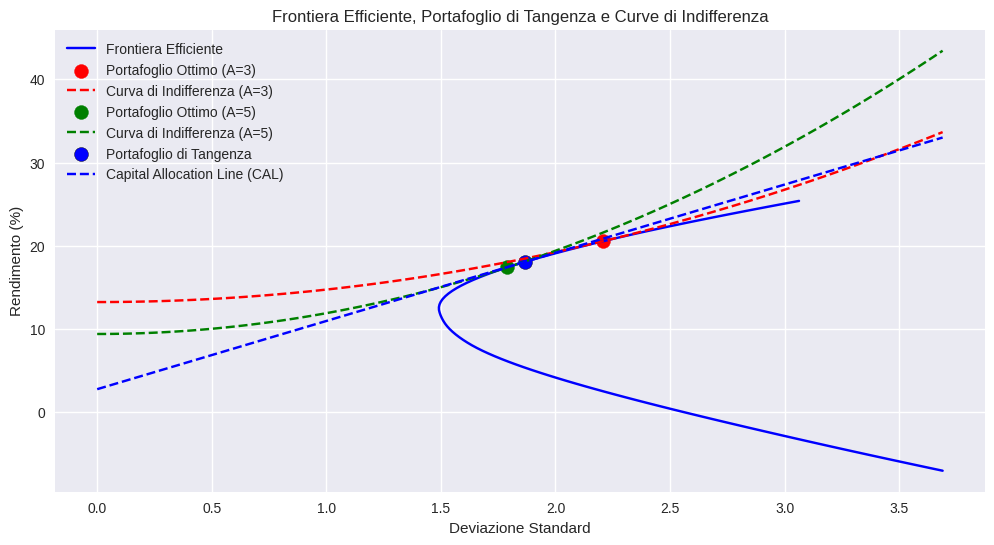

In [ ]:
tickers = ['ASML', 'TTE', 'AD.AS', 'TIT.MI', 'SIE.DE']

# Scaricare i dati
start_date = "2015-03-01"
end_date = "2025-03-01"
df = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)
df_close = df['Close'].ffill()

# Calcolo dei rendimenti mensili
rendimenti = df_close.resample('M').last().pct_change().dropna()

# Statistiche dei rendimenti
medie = rendimenti.mean() * 12 * 100
cov = rendimenti.cov() * 12 * 100

n_assets = len(tickers)
rf = 2.78  # Tasso privo di rischio

# Funzioni per il calcolo di varianza, rendimento e Sharpe Ratio
def min_varianza(w, cov):
    return np.dot(w.T, np.dot(cov, w))

def rendimento(w, medie):
    return np.dot(w, medie)

def sharpe_ratio_negativo(w, medie, cov, rf):
    port_rend = rendimento(w, medie)
    port_std = np.sqrt(min_varianza(w, cov))
    return -((port_rend - rf) / port_std)  # Negativo per minimizzazione

# Ottimizzazione del portafoglio di tangenza
w0 = np.ones(n_assets) / n_assets
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1) for _ in range(n_assets)]
result = minimize(sharpe_ratio_negativo, w0, args=(medie, cov, rf), bounds=bounds, constraints=cons)

# Calcolo delle caratteristiche del portafoglio di tangenza
if result.success:
    w_tangency = result.x
    rendimento_tangency = rendimento(w_tangency, medie)
    deviazione_standard_tangency = np.sqrt(min_varianza(w_tangency, cov))
    sharpe_tangency = (rendimento_tangency - rf) / deviazione_standard_tangency

    # Stampa delle caratteristiche del portafoglio di tangenza
    print("Pesi ottimali del portafoglio di tangenza:")
    for asset, peso in zip(tickers, w_tangency):
        print(f"{asset}: {peso:.4f}")
    print(f"\nRendimento atteso del portafoglio di tangenza: {rendimento_tangency:.2f}%")
    print(f"Deviazione standard del portafoglio di tangenza: {deviazione_standard_tangency:.2f}%")
    print(f"Sharpe Ratio del portafoglio di tangenza: {sharpe_tangency:.2f}")
else:
    raise ValueError("Ottimizzazione fallita.")

# Funzione di utilità per ottimizzazione dei portafogli efficienti (A=3, A=5)
def funzione_utilita(w, medie, cov, A):
    port_rend = rendimento(w, medie)
    port_risk = np.sqrt(min_varianza(w, cov))
    return -(port_rend - (A / 2) * (port_risk ** 2))  # Funzione di utilità negativa

# Ottimizzazione per A=3 e A=5 (portafogli ottimi)
A_values = [3, 5]
w0 = np.ones(n_assets) / n_assets
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = [(0, 1) for _ in range(n_assets)]
portafogli_ottimi = {}

for A in A_values:
    result = minimize(funzione_utilita, w0, args=(medie, cov, A), bounds=bounds, constraints=cons)
    if result.success:
        w_opt = result.x
        rend_opt = rendimento(w_opt, medie)
        risk_opt = np.sqrt(min_varianza(w_opt, cov))
        portafogli_ottimi[A] = (w_opt, rend_opt, risk_opt)

# Costruzione della frontiera efficiente
n_punti = 100
rendimenti_target = np.linspace(min(medie), max(medie), n_punti)
risk_eff = []

for r_target in rendimenti_target:
    cons_eff = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
                {'type': 'eq', 'fun': lambda w: rendimento(w, medie) - r_target})
    result_eff = minimize(min_varianza, w0, args=(cov,), bounds=bounds, constraints=cons_eff)
    if result_eff.success:
        risk_eff.append(np.sqrt(result_eff.fun))
    else:
        risk_eff.append(np.nan)

# Grafico della frontiera efficiente, portafoglio di tangenza e curve di indifferenza
plt.figure(figsize=(12, 6))
plt.plot(risk_eff, rendimenti_target, 'b-', label="Frontiera Efficiente")
colors = ['r', 'g']

# Tracciamento dei portafogli ottimi per A=3 e A=5
for i, A in enumerate(A_values):
    w_opt, rend_opt, risk_opt = portafogli_ottimi[A]
    plt.scatter(risk_opt, rend_opt, color=colors[i], s=100, label=f"Portafoglio Ottimo (A={A})")

    # Curva di indifferenza
    risk_range = np.linspace(0, max(risk_eff), 100)
    util = rend_opt - (A / 2) * (risk_opt ** 2)
    indifferenza = util + (A / 2) * (risk_range ** 2)
    plt.plot(risk_range, indifferenza, colors[i]+'--', label=f"Curva di Indifferenza (A={A})")

# Tracciamento del portafoglio di tangenza
plt.scatter(deviazione_standard_tangency, rendimento_tangency, color="b", s=100, edgecolors="black", label="Portafoglio di Tangenza")
# Capital Allocation Line (CAL)
risk_range = np.linspace(0, max(risk_eff), 100)
cal_line = rf + sharpe_tangency * risk_range
plt.plot(risk_range, cal_line, color="b", linestyle="--", label="Capital Allocation Line (CAL)")


plt.xlabel("Deviazione Standard")
plt.ylabel("Rendimento (%)")
plt.title("Frontiera Efficiente, Portafoglio di Tangenza e Curve di Indifferenza")
plt.legend()
plt.grid(True)
plt.show()
